In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read data
df=pd.read_csv('cleaned_shark.csv')

In [3]:
# preview of data
df.head()

,Unnamed: 0,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,...,shark_group,title,episode-season,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers
0,0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,Ionic Ear,1-1,0,1,1000000,15,6666667,1,0
1,1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,Mr. Tod's Pie Factory,1-1,1,1,460000,10,4600000,1,0
2,2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,Ava the Elephant,1-1,1,1,50000,15,333333,1,0
3,3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,College Foxes Packing Boxes,1-1,0,1,250000,25,1000000,1,0
4,4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,A Perfect Pear,1-2,1,2,500000,15,3333333,1,0


In [4]:
# unique values for category in the category feature
dict(df.category.value_counts())

{'Specialty Food': 59,
 'Novelties': 31,
 'Baby and Child Care': 23,
 'Personal Care and Cosmetics': 19,
 'Online Services': 18,
 'Storage and Cleaning Products': 17,
 'Toys and Games': 15,
 'Consumer Services': 12,
 'Kitchen Tools': 11,
 'Pet Products': 11,
 'Outdoor Recreation': 10,
 'Electronics': 9,
 "Men and Women's Apparel": 9,
 "Baby and Children's Entertainment": 9,
 "Women's Apparel": 8,
 'Automotive': 8,
 "Baby and Children's Apparel and Accessories": 8,
 'Entertainment': 8,
 'Professional Services': 8,
 'Holiday Cheer': 7,
 'Undergarments and Basics': 7,
 'Homeopathic Remedies': 6,
 'Home Accessories': 6,
 "Women's Accessories": 6,
 'Weddings': 6,
 'Fitness Programs': 6,
 'Furniture': 5,
 "Men and Women's Shoes": 5,
 "Men's Accessories": 5,
 'Gardening': 5,
 'Home Improvement': 5,
 'Health and Well-Being': 5,
 'Non-Alcoholic Beverages': 5,
 'Fitness Apparel and Accessories': 5,
 "Men and Women's Accessories": 4,
 'Party Supplies': 4,
 "Women's Shoes": 4,
 'Music': 4,
 'Water

In [5]:
# lists of leading categorical keys and amount of unique values
cat_key=[]
cat_val=[]
for key in dict(df.category.value_counts()).keys():
    cat_key.append(key)
for val in dict(df.category.value_counts()).values():
    cat_val.append(val)

In [6]:
# focusing in on 15 leading categories
cat_key=cat_key[0:15]
cat_val=cat_val[0:15]

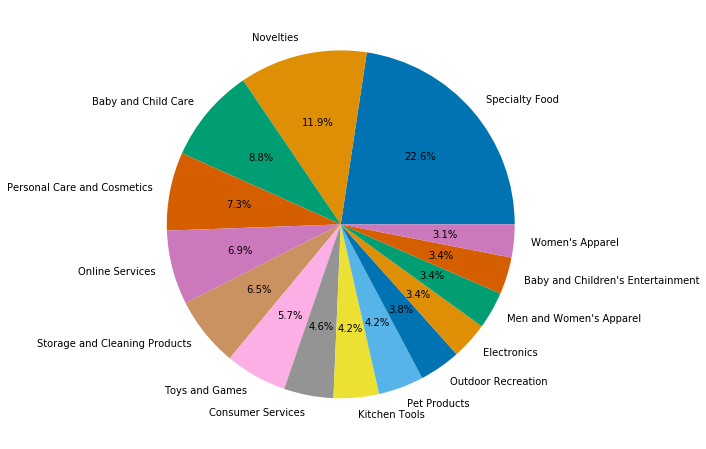

In [7]:
# pie chart of leading pitch categories
with sns.color_palette('colorblind'):
    plt.figure(figsize=(15,8))
    plt.pie(x=cat_val,labels=cat_key,autopct='%1.1f%%',)
    plt.show()

In [8]:
# columns in data
df.columns

Index(['Unnamed: 0', 'description', 'category', 'entrepreneurs', 'location',
       'website', 'website_length', 'shark1', 'shark2', 'shark3', 'shark4',
       'shark5', 'sharks', 'shark_group', 'title', 'episode-season', 'deal',
       'episode', 'askedFor', 'exchangeForStake', 'valuation', 'season',
       'Multiple_Entreprenuers'],
      dtype='object')

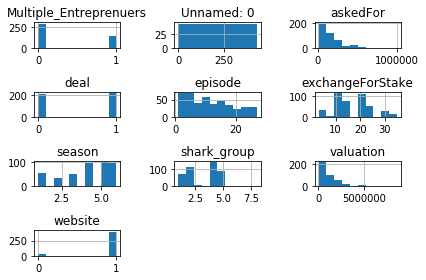

In [9]:
# histogram of nummerical data
df.hist()
plt.tight_layout()
plt.show()

In [10]:
# removing pointless feature
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
# binning variables with many unique values
for col in ['askedFor','exchangeForStake','valuation']:
    df[f'{col}_bin']=pd.cut(df[col],bins=3,labels=[0,1,2])

In [12]:
df.head()

,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,shark4,...,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,askedFor_bin,exchangeForStake_bin,valuation_bin
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,1,1000000,15,6666667,1,0,2,1,2
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,1,460000,10,4600000,1,0,1,0,1
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,1,50000,15,333333,1,0,0,1,0
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,1,250000,25,1000000,1,0,0,2,0
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,2,500000,15,3333333,1,0,1,1,1


In [13]:
# checking for entrepreneurs who appeared twice in first 6 seasons
df[df.duplicated(subset='entrepreneurs')==True].entrepreneurs.unique()

array(['James Martin', nan, 'Dave Alwan'], dtype=object)

## Target correlations

In [14]:
# list of top 20 most common pitch categories
a=list(dict(df.category.value_counts()))[0:20]

In [15]:
# subsetting dataframe based on being in top 20 categories
top_cat_df = df[df.category.isin(a)]

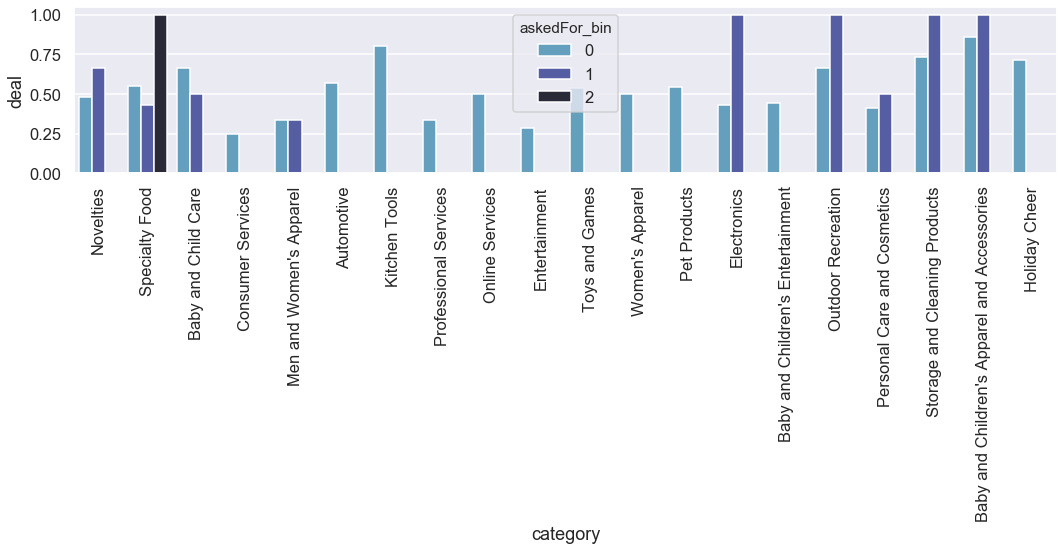

In [16]:
# likelihood of deal based on category
with sns.color_palette('icefire'):
    with sns.axes_style('darkgrid'):
        with sns.plotting_context('talk'):
            
            plt.figure(figsize=(15,8))
            
            plt.subplot(1,1,1)
            sns.barplot(top_cat_df.category,top_cat_df.deal,ci=None,hue=top_cat_df.askedFor_bin)
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.show()

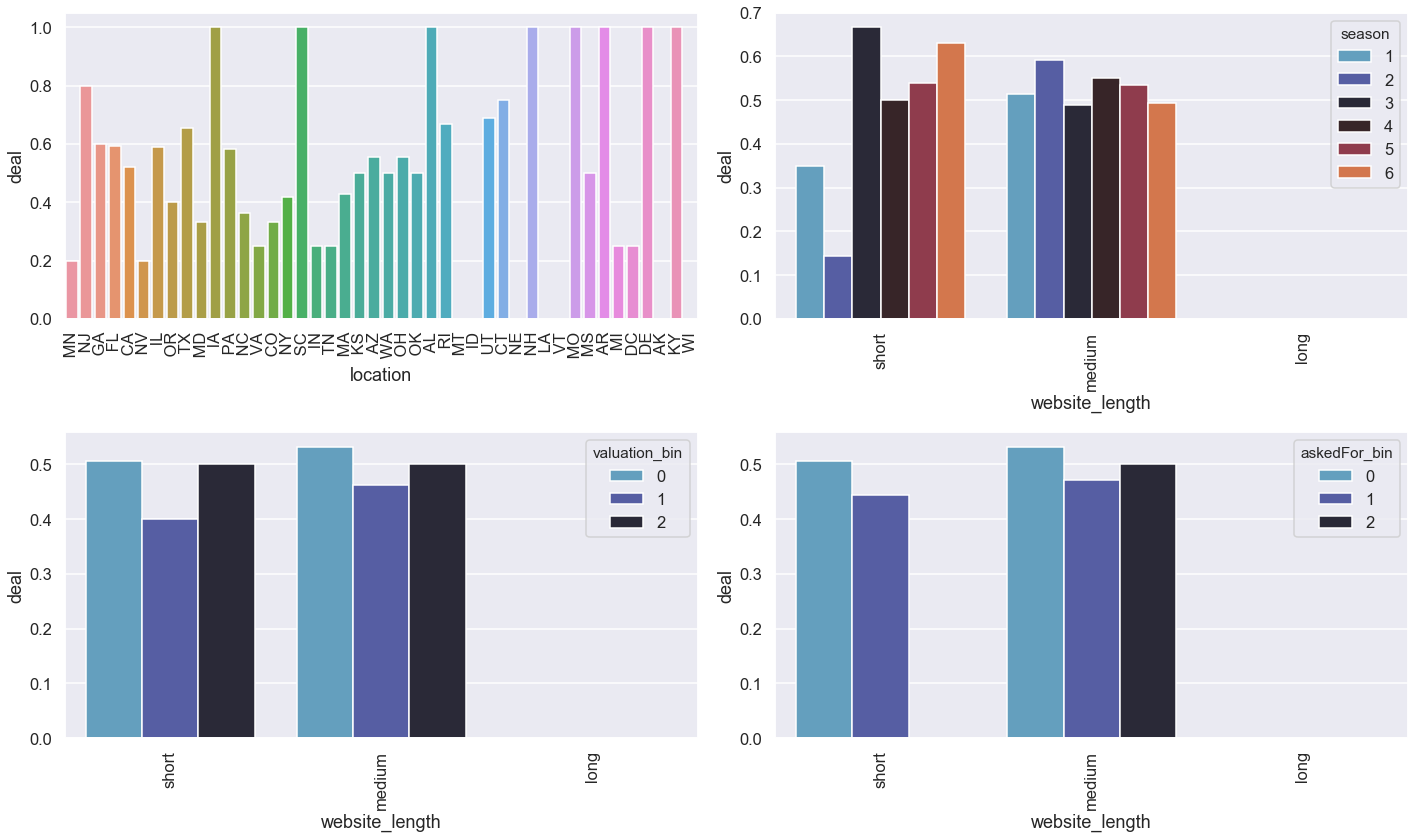

In [17]:
# likelihood of deal based on a couple of factors
with sns.color_palette('icefire'):
    with sns.axes_style('darkgrid'):
        with sns.plotting_context('talk'):
            
            plt.figure(figsize=(20,12))
            
            plt.subplot(2,2,1)
            sns.barplot(df.location,df.deal,ci=None)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.subplot(2,2,2)
            sns.barplot(df.website_length,df.deal,ci=None,hue=df.season)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.subplot(2,2,3)
            sns.barplot(df.website_length,df.deal,ci=None,hue=df.valuation_bin)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.subplot(2,2,4)
            sns.barplot(df.website_length,df.deal,ci=None,hue=df.askedFor_bin)
            plt.xticks(rotation='vertical')
            plt.tight_layout()

            plt.show()

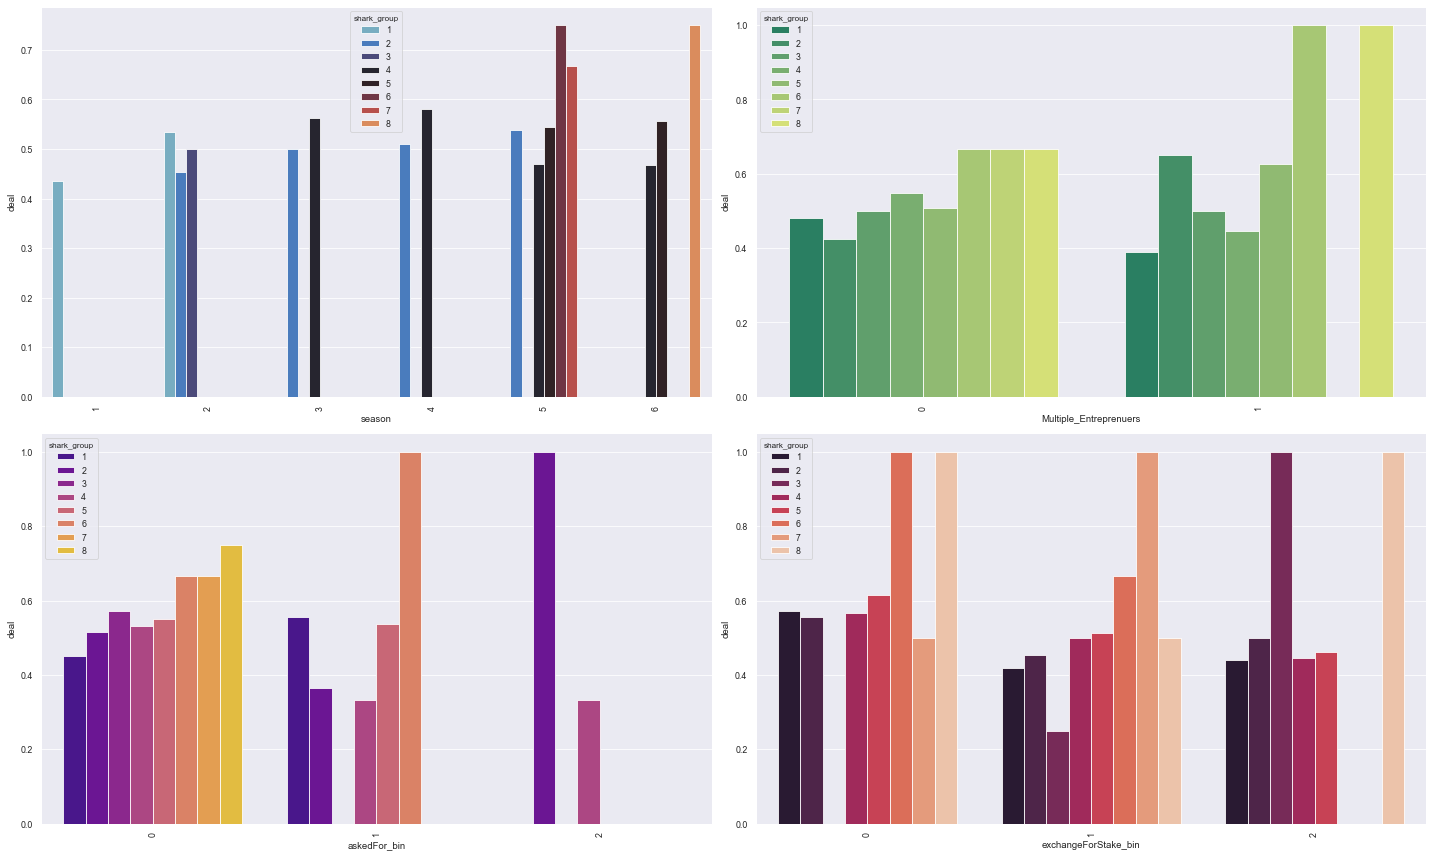

In [18]:
# likelihood of deal based on a couple of factors
with sns.color_palette('icefire'):
    with sns.axes_style('darkgrid'):
        with sns.plotting_context('paper'):
            
            plt.figure(figsize=(20,12))
            
            plt.subplot(2,2,1)
            sns.barplot(df.season,df.deal,ci=None,hue=df.shark_group,palette='icefire')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.subplot(2,2,2)
            sns.barplot(df.Multiple_Entreprenuers,df.deal,ci=None,hue=df.shark_group,palette='summer')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.subplot(2,2,3)
            sns.barplot(df.askedFor_bin,df.deal,ci=None,hue=df.shark_group,palette='plasma')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.subplot(2,2,4)
            sns.barplot(df.exchangeForStake_bin,df.deal,ci=None,hue=df.shark_group,palette='rocket')
            plt.xticks(rotation='vertical')
            plt.tight_layout()
            
            plt.show()

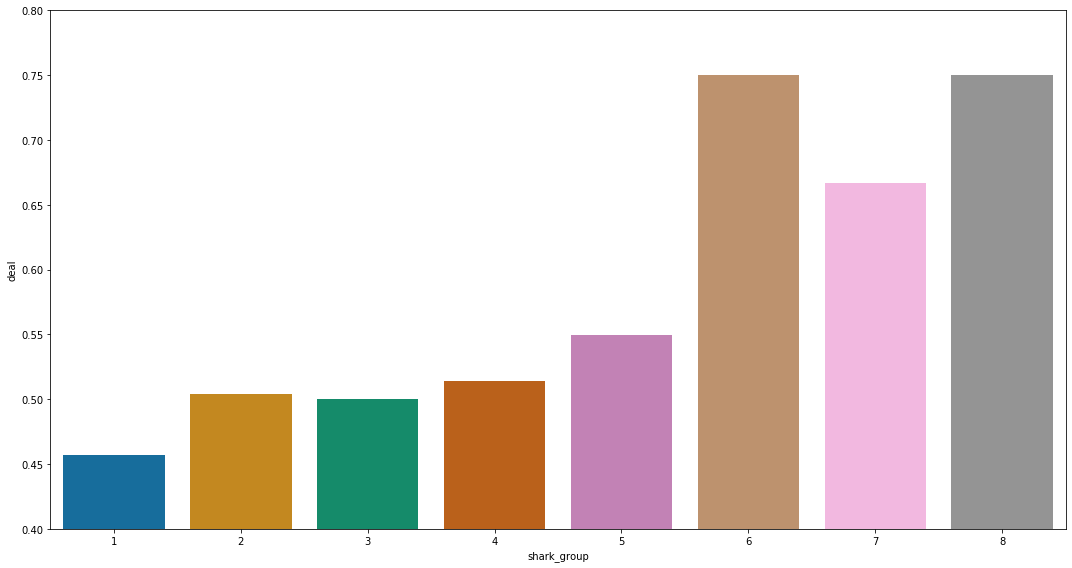

In [19]:
# likelihood of deal based on shark group
plt.figure(figsize=(15,8))
sns.barplot(df.shark_group,df.deal,ci=False,palette='colorblind')
plt.ylim(0.4,0.8)
plt.tight_layout()
plt.show()

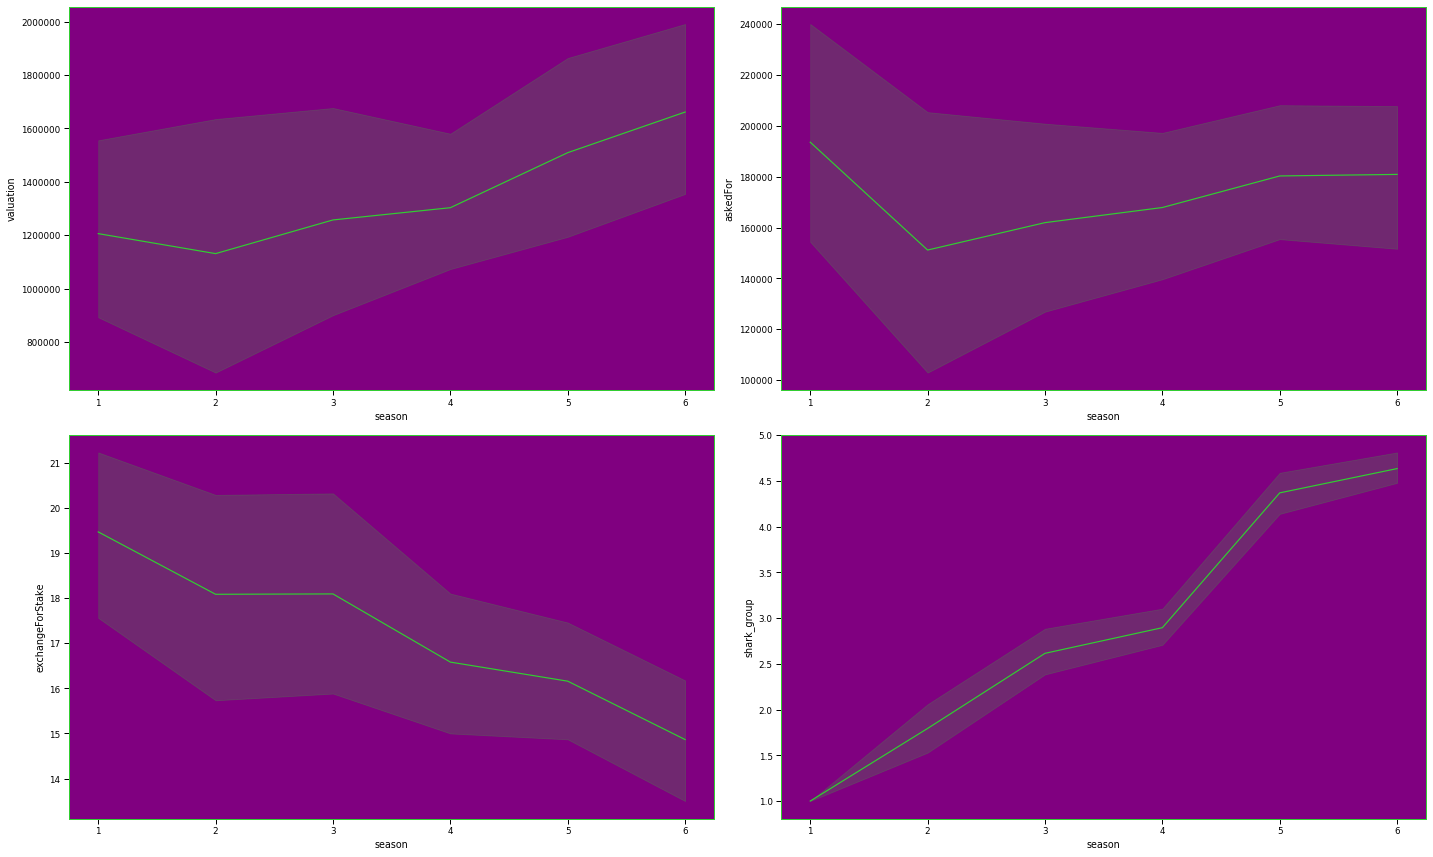

In [20]:
# trends of valuation, asked for, stake, and shark group across seasons
with sns.axes_style({'axes.facecolor':'purple','axes.edgecolor':'limegreen'}):
    with sns.plotting_context('paper'):
            
            plt.figure(figsize=(20,12))
            
            plt.subplot(2,2,1)
            sns.lineplot(df.season,df.valuation,color='limegreen')
            plt.tight_layout()
            
            plt.subplot(2,2,2)
            sns.lineplot(df.season,df.askedFor,color='limegreen')
            plt.tight_layout()

            plt.subplot(2,2,3)
            sns.lineplot(df.season,df.exchangeForStake,color='limegreen')
            plt.tight_layout()
            
            plt.subplot(2,2,4)
            sns.lineplot(df.season,df.shark_group,color='limegreen')
            plt.tight_layout()
            
            plt.show()

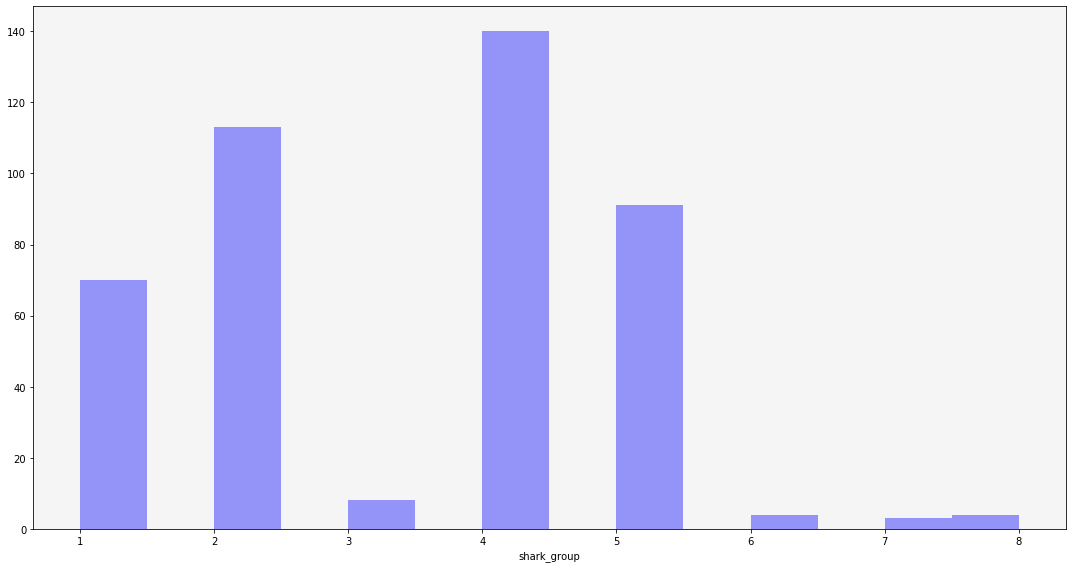

In [21]:
# frequency of shark groups

with sns.axes_style({'axes.facecolor':'whitesmoke'}):

    plt.figure(figsize=(15,8))

    sns.distplot(df.shark_group,kde=False,color='blue')
    
    plt.tight_layout()

    plt.show()

## Now, I will set up some data to see trends over the seasons

In [22]:
# crating data frames for pitches from each season
s1 = df[df.season==1]
s2 = df[df.season==2]
s3 = df[df.season==3]
s4 = df[df.season==4]
s5 = df[df.season==5]
s6 = df[df.season==6]

In [23]:
# stats for season 1
s1.describe()

,website,shark_group,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers
count,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.0,55.000000
mean,0.709091,1.0,0.436364,7.181818,193618.181818,19.472727,1.205598e+06,1.0,0.290909
std,0.458368,0.0,0.500505,4.114522,171036.328273,6.882222,1.289079e+06,0.0,0.458368
min,0.000000,1.0,0.000000,1.000000,30000.000000,10.000000,1.000000e+05,1.0,0.000000
25%,0.000000,1.0,0.000000,4.000000,77500.000000,15.000000,4.650000e+05,1.0,0.000000
50%,1.000000,1.0,0.000000,7.000000,150000.000000,20.000000,7.575760e+05,1.0,0.000000
75%,1.000000,1.0,1.000000,11.000000,250000.000000,25.000000,1.416666e+06,1.0,1.000000
max,1.000000,1.0,1.000000,14.000000,1000000.000000,35.000000,6.666667e+06,1.0,1.000000


In [24]:
# crating data frame for season by season stats
df_s = pd.DataFrame(columns=['season','pitches','deal_mean','askedFor_mean','askedFor_max','askedFor_min',
                            'stake_mean','stake_max','stake_min',
                            'value_mean','value_max','value_min'])

In [25]:
# creating list of rows to add in season description data frame
ss=[s1.describe(),s2.describe(),s3.describe(),s4.describe(),s5.describe(),s6.describe()]

In [26]:
# this is hard to explain but adding initial values to later change
for col in df_s.columns:
    df_s[col]=df_s[col].astype(float)
    df_s[col]=4

In [27]:
# this is hard to explain but adding initial values to later change
df_s.pitches=[4,4,4,4,4,4]

In [28]:
# preivew of new data frame
df_s

,season,pitches,deal_mean,askedFor_mean,askedFor_max,askedFor_min,stake_mean,stake_max,stake_min,value_mean,value_max,value_min
0,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# assigning actual data
i = 0
for dfr in ss:
    
    df_s.season[i]=i
    df_s.pitches[i]=dfr.website[0]
    df_s.deal_mean[i]=dfr.deal[1]
    df_s.askedFor_mean[i]=dfr.askedFor[1]
    df_s.askedFor_max[i]=dfr.askedFor[7]
    df_s.askedFor_min[i]=dfr.askedFor[3]
    df_s.stake_mean[i]=dfr.exchangeForStake[1]
    df_s.stake_max[i]=dfr.exchangeForStake[7]
    df_s.stake_min[i]=dfr.exchangeForStake[3]
    df_s.value_mean[i]=dfr.valuation[1]
    df_s.value_max[i]=dfr.valuation[7]
    df_s.value_min[i]=dfr.valuation[3]
    i = i+1

In [30]:
# preview of data by season season 0 = season 0+1 and so on
df_s

,season,pitches,deal_mean,askedFor_mean,askedFor_max,askedFor_min,stake_mean,stake_max,stake_min,value_mean,value_max,value_min
0,0.0,55,0.436364,193618.181818,1000000.0,30000.0,19.472727,35.0,10.0,1.205598e+06,6666667.0,100000.0
1,1.0,34,0.500000,151176.470588,500000.0,25000.0,18.088235,30.0,5.0,1.130735e+06,6000000.0,125000.0
2,2.0,52,0.519231,161961.538462,540000.0,10000.0,18.096154,35.0,3.0,1.256879e+06,6666667.0,40000.0
3,3.0,96,0.541667,167906.250000,1000000.0,25000.0,16.583333,35.0,5.0,1.302738e+06,8333333.0,100000.0
4,4.0,100,0.530000,180330.000000,700000.0,10000.0,16.160000,33.0,3.0,1.508961e+06,8600000.0,100000.0
5,5.0,96,0.520833,180937.500000,750000.0,20000.0,14.864583,35.0,4.0,1.661149e+06,7500000.0,100000.0


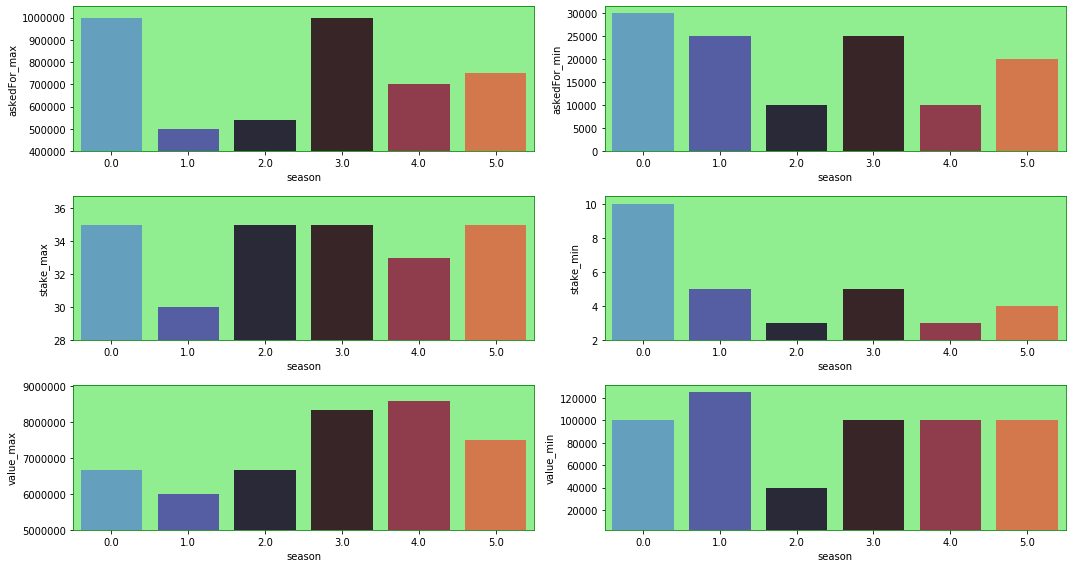

In [31]:
# trends over seasons
with sns.color_palette('icefire'):
    with sns.axes_style({'axes.facecolor':'lightgreen','axes.edgecolor':'green'}):

        plt.figure(figsize=(15,8))

        plt.subplot(3,2,1)
        sns.barplot(df_s.season,df_s.askedFor_max)
        plt.tight_layout()
        plt.ylim(400000)

        plt.subplot(3,2,2)
        sns.barplot(df_s.season,df_s.askedFor_min)
        plt.tight_layout()

        plt.subplot(3,2,3)
        sns.barplot(df_s.season,df_s.stake_max)
        plt.tight_layout()
        plt.ylim(28,)

        plt.subplot(3,2,4)
        sns.barplot(df_s.season,df_s.stake_min)
        plt.tight_layout()
        plt.ylim(2,)

        plt.subplot(3,2,5)
        sns.barplot(df_s.season,df_s.value_max)
        plt.tight_layout()
        plt.ylim(5000000)

        plt.subplot(3,2,6)
        sns.barplot(df_s.season,df_s.value_min)
        plt.tight_layout()
        plt.ylim(2500)

        plt.show()

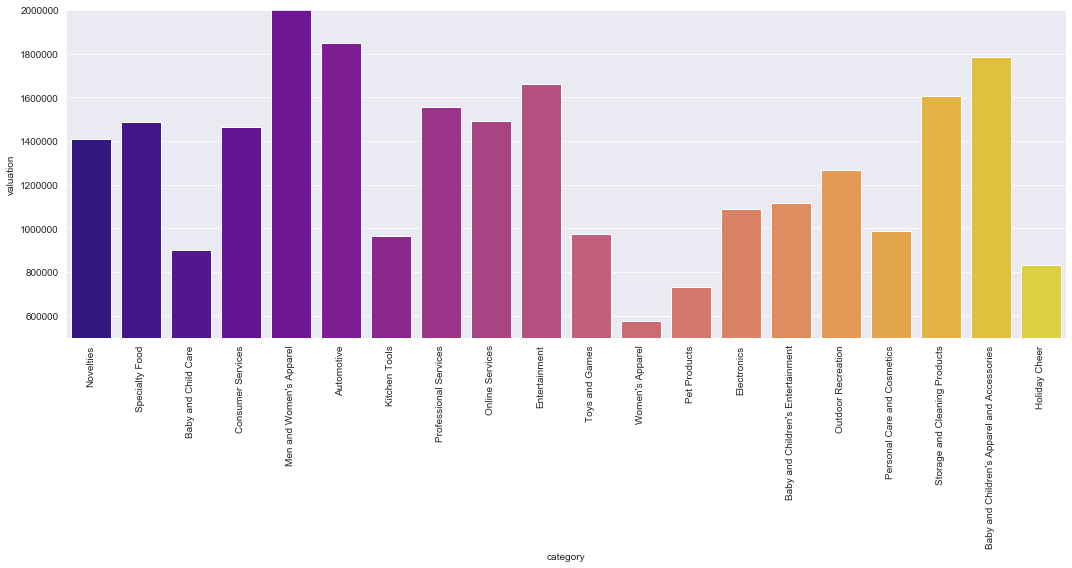

In [32]:
# average valuation by common categories
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(15,8))
    sns.barplot(top_cat_df.category,top_cat_df.valuation,palette='plasma',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(500000,2*10**6)
    plt.tight_layout()
    plt.show()

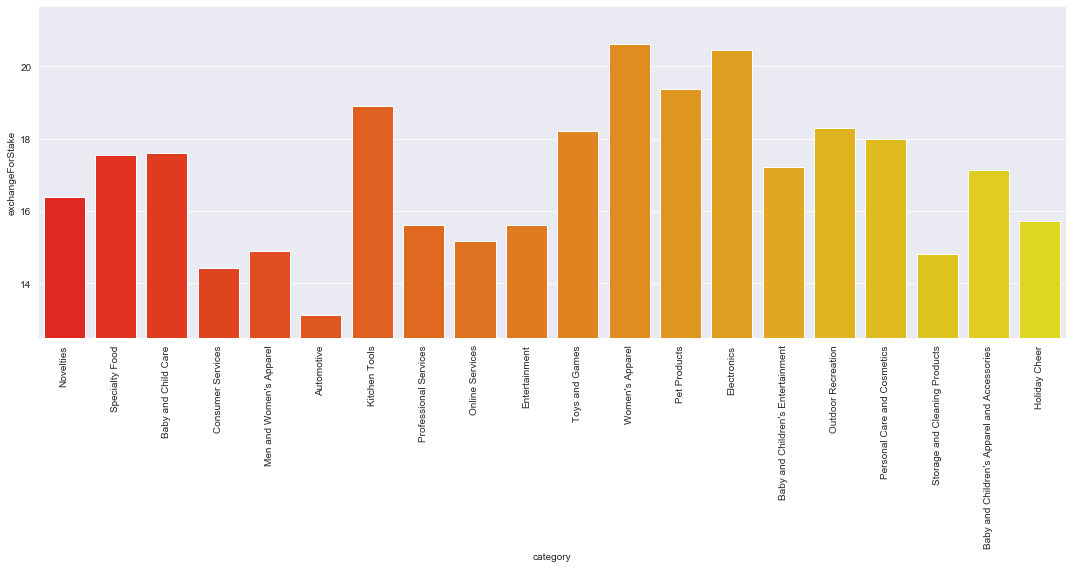

In [33]:
# average stake by leading categories
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(15,8))
    sns.barplot(top_cat_df.category,top_cat_df.exchangeForStake,palette='autumn',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(12.5)
    plt.tight_layout()
    plt.show()

In [34]:
# unique groups of sharks in first 6 seasons
df.sharks.unique()

array(['[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Kevin Harrington\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Jeff Foxworthy\', \'Daymond John\']',
       '[\'Lori Greiner\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', \'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'John Paul DeJoria\']',
       '[\'Lori Greiner\', \'Steve Tisch\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'Nick Woodman\']'],
      dtype=object)

In [35]:
# list of shark groups lacking an extra shark
no_guest=df[df.shark_group.isin([1,2,4,5])]

In [36]:
# list of shark groups with a guest shark
guest_shark = df[df.shark_group.isin([3,6,7,8])]

In [37]:
# look at data pitched to guest sharks
guest_shark
# deal asked for stake valuation

,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,shark4,...,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,askedFor_bin,exchangeForStake_bin,valuation_bin
67,A country-style apparel store sold through Spo...,Men and Women's Apparel,Mike Abbaticchio & Shon Lees,FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,1,4,50000,25,200000,2,0,0,2,0
68,A children's seat attachable to luggage that i...,Baby and Child Care,Darryl and Randy Lenz,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,1,4,50000,25,200000,2,1,0,2,0
69,Premium beef jerky made without additives or p...,Specialty Food,Ken Howell,NC,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,0,4,25000,20,125000,2,0,0,1,0
70,A rubber band that works as a money clip.,Novelties,Johnny Gennaro & Vinny Pastore,NY,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,1,4,50000,20,250000,2,0,0,1,0
79,An impact-resistant hydration system that atta...,Fitness Apparel and Accessories,Chris Spencer,TX,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,1,7,50000,25,200000,2,0,0,2,0
80,A mobile entertainment company running special...,Entertainment,Stuart and David Pikoff,TX,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,0,7,500000,10,5000000,2,1,1,0,1
81,"A barf bag worn around the neck, for small chi...",Baby and Child Care,Les Cookson,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,0,7,30000,15,200000,2,0,0,1,0
82,A push mower marketed as a more eco-friendly a...,Gardening,Andy Humphrey,MD,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Jeff Foxworthy,...,0,7,90000,20,450000,2,0,0,1,0
259,"An all-electric, jet-propelled body board.",Outdoor Recreation,NaN,CA,1,medium,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,...,0,7,250000,20,1250000,5,0,0,1,0
260,Tree T Pee is an agricultural water conservati...,Gardening,John (Johnny) G. Georges,FL,1,medium,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,...,1,7,150000,20,750000,5,0,0,1,0


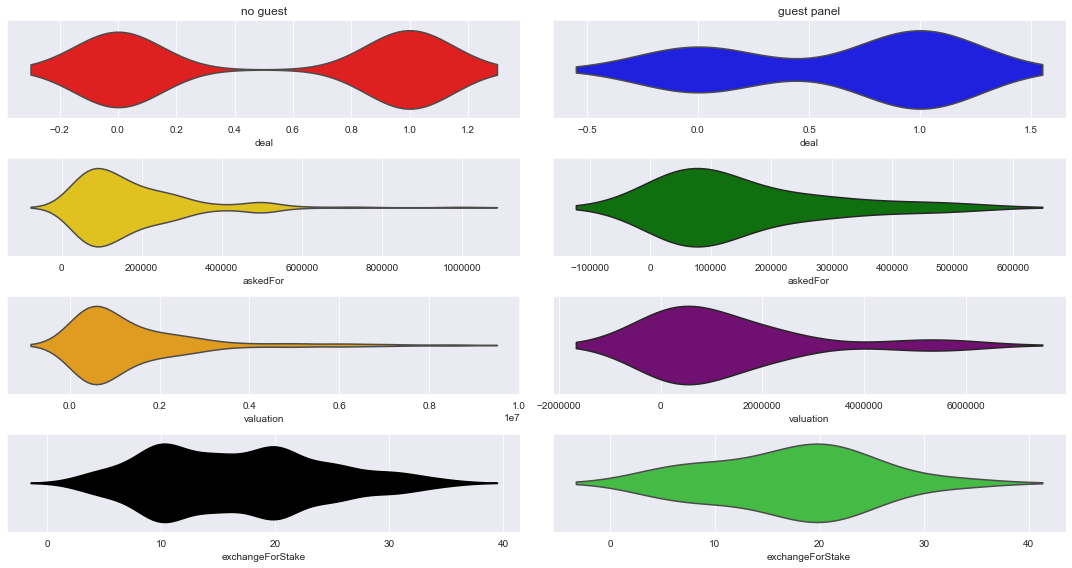

In [38]:
# comparisons of distributions with no guest sharks versus with guest sharks
with sns.axes_style('darkgrid'):

    colors = ['red','blue','gold','green','orange','purple','black','limegreen']

    plt.figure(figsize=(15,8))

    plt.subplot(4,2,1)
    sns.violinplot(no_guest.deal,color=colors[0],inner=None)
    plt.tight_layout()
    plt.title('no guest')

    plt.subplot(4,2,2)
    sns.violinplot(guest_shark.deal,color=colors[1],inner=None)
    plt.tight_layout()
    plt.title('guest panel')

    plt.subplot(4,2,3)
    sns.violinplot(no_guest.askedFor,color=colors[2],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,4)
    sns.violinplot(guest_shark.askedFor,color=colors[3],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,5)
    sns.violinplot(no_guest.valuation,color=colors[4],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,6)
    sns.violinplot(guest_shark.valuation,color=colors[5],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,7)
    sns.violinplot(no_guest.exchangeForStake,color=colors[6],inner=None)
    plt.tight_layout()

    plt.subplot(4,2,8)
    sns.violinplot(guest_shark.exchangeForStake,color=colors[7],inner=None)
    plt.tight_layout()

    plt.show()

In [39]:
# amount of unique presentations by location
df.location.value_counts()

 CA    123
 NY     36
 TX     32
 FL     27
 IL     17
 UT     16
 GA     15
 OR     15
 CO     12
 PA     12
 NC     11
 NJ     10
 OH      9
 AZ      9
 WA      8
 VA      8
 MA      7
 MN      5
 NV      5
 IN      4
 TN      4
 MO      4
 DC      4
 CT      4
 MI      4
 SC      3
 RI      3
 MD      3
 KY      2
 LA      2
 VT      2
 KS      2
 MS      2
 OK      2
 ID      2
 NH      1
 WI      1
 IA      1
 AK      1
 NE      1
 MT      1
 AL      1
 AR      1
 DE      1
Name: location, dtype: int64

In [40]:
# creating lists in preparation for location visual
location_key=[]
location_val=[]
for key in dict(df.location.value_counts()).keys():
    location_key.append(key)
for val in dict(df.location.value_counts()).values():
    location_val.append(val)

In [41]:
# restricting survey to top 15 most common locations
location_key=location_key[0:15]
location_val=location_val[0:15]

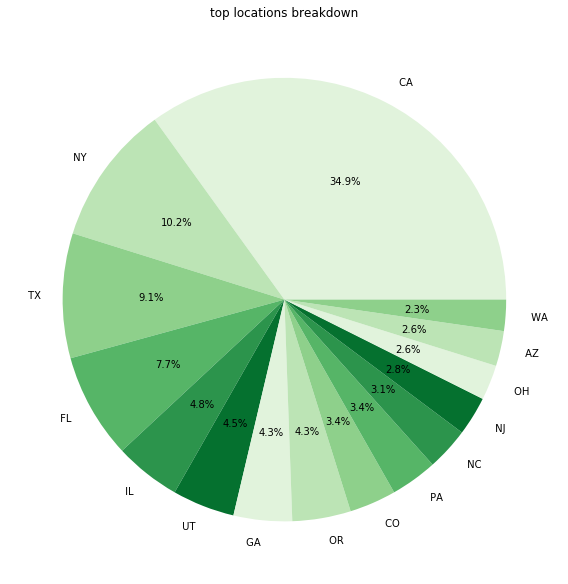

In [42]:
# breakdown of locations with most pitches
with sns.color_palette('Greens'):
    plt.figure(figsize=(15,8))
    plt.pie(x=location_val,labels=location_key,autopct='%1.1f%%')
    plt.tight_layout()
    plt.title('top locations breakdown')
    plt.show()

In [43]:
# subset data frame where location in top 15 most common locations
location_df = df[df.location.isin(location_key)]

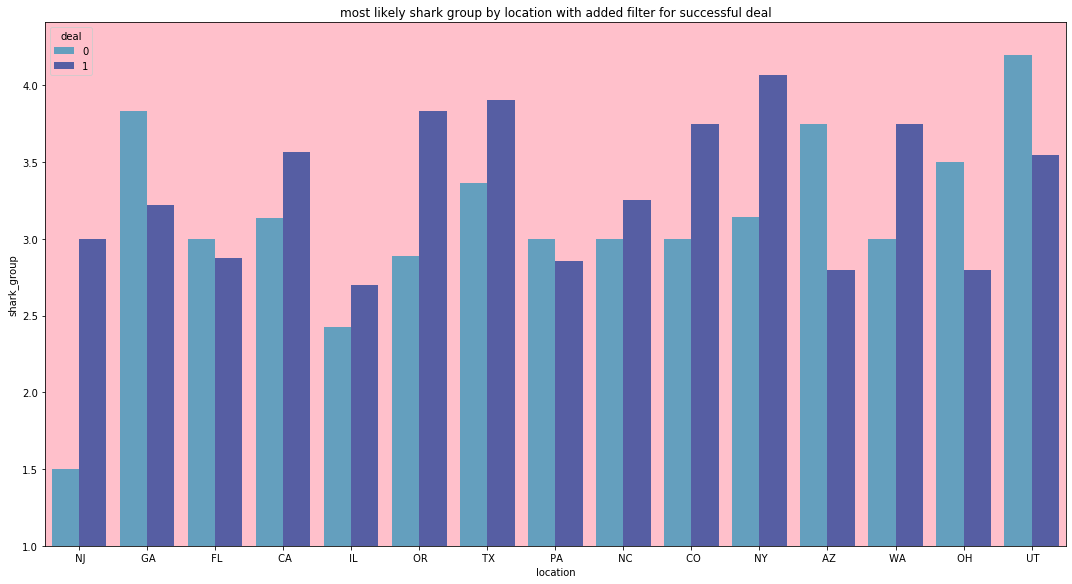

In [44]:
# most likely shark group by location with filter for succesful pitch
with sns.axes_style({'axes.facecolor':'pink'}):
    with sns.color_palette('icefire'):
        plt.figure(figsize=(15,8))
        sns.barplot(location_df.location,location_df.shark_group,hue=location_df.deal,ci=None)
        plt.tight_layout()
        plt.ylim(1,)
        plt.title('most likely shark group by location with added filter for successful deal')
        plt.show()

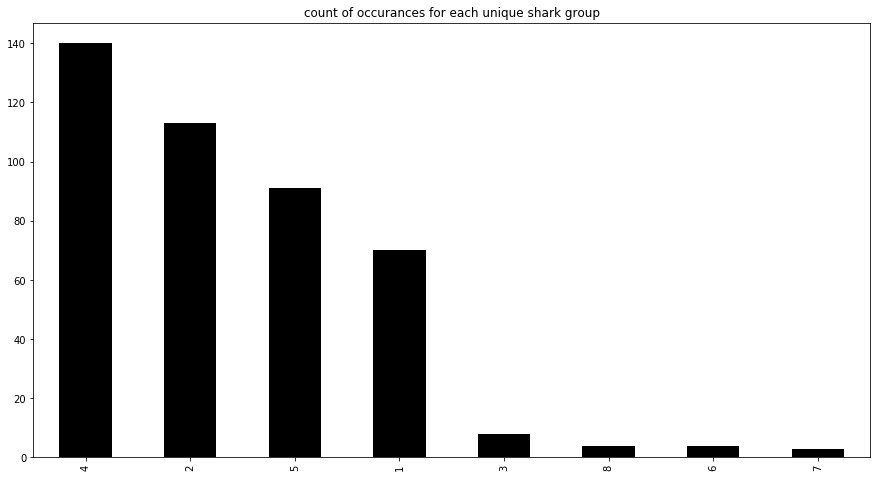

In [45]:
# frequency of unique shark groups
plt.figure(figsize=(15,8))
df.shark_group.value_counts().plot(kind='bar',color='k')
plt.title('count of occurances for each unique shark group')
plt.show()

In [46]:
# preview of leading categories data with only location and category included
top_cat_df[['location','category']].head()

,location,category
0,MN,Novelties
1,NJ,Specialty Food
2,GA,Baby and Child Care
3,FL,Consumer Services
4,CA,Specialty Food


In [47]:
# data with most common categories that includes category and locations
loc_dfs=[]
for l in top_cat_df.location.unique():
    loc_dfs.append(top_cat_df[['location','category']][top_cat_df[['location','category']].location==l])

In [48]:
# all data with focus on location and category
all_dfs = []
for l in df.location.unique():
    all_dfs.append(df[['location','category']][df[['location','category']].location==l])    

In [49]:
# preview of location and category data in top 15 categories of pitches
loc_dfs[1]

,location,category
1,NJ,Specialty Food
46,NJ,Baby and Children's Entertainment
189,NJ,Novelties
195,NJ,Novelties
198,NJ,Automotive
257,NJ,Professional Services


In [50]:
# breakdown of top categories (within 15 leading categories) by location
for f in loc_dfs:
    print(f.location.unique())
    print(f.category.value_counts())
    print('-'*50)

[' MN']
Novelties            1
Specialty Food       1
Consumer Services    1
Electronics          1
Name: category, dtype: int64
--------------------------------------------------
[' NJ']
Novelties                            2
Specialty Food                       1
Baby and Children's Entertainment    1
Automotive                           1
Professional Services                1
Name: category, dtype: int64
--------------------------------------------------
[' GA']
Baby and Child Care    6
Specialty Food         1
Consumer Services      1
Automotive             1
Name: category, dtype: int64
--------------------------------------------------
[' FL']
Toys and Games                       3
Novelties                            3
Specialty Food                       2
Personal Care and Cosmetics          2
Online Services                      1
Outdoor Recreation                   1
Men and Women's Apparel              1
Kitchen Tools                        1
Pet Products                 

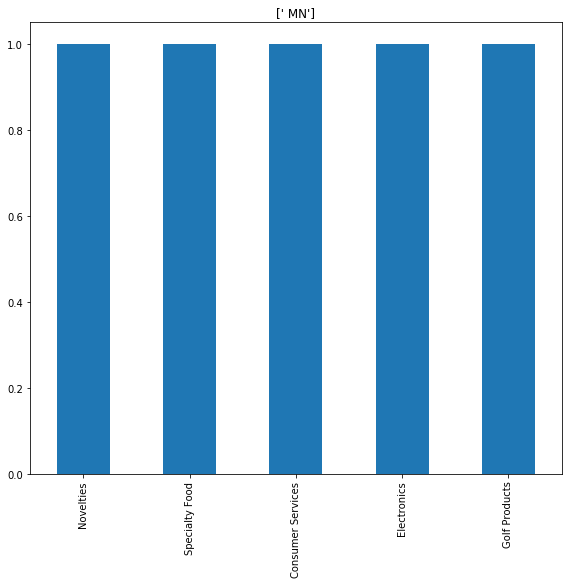

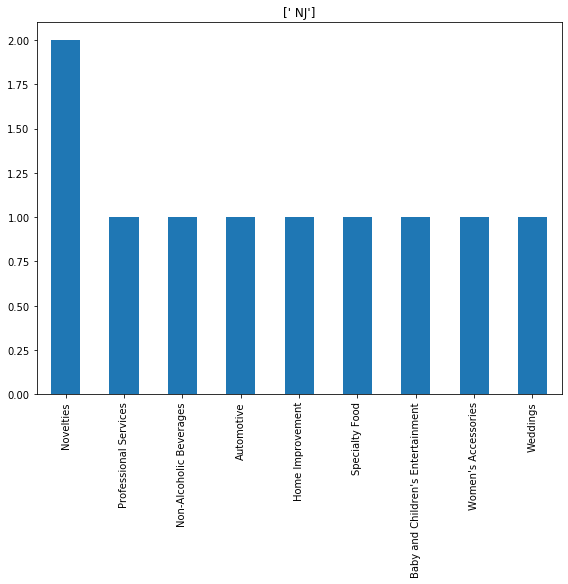

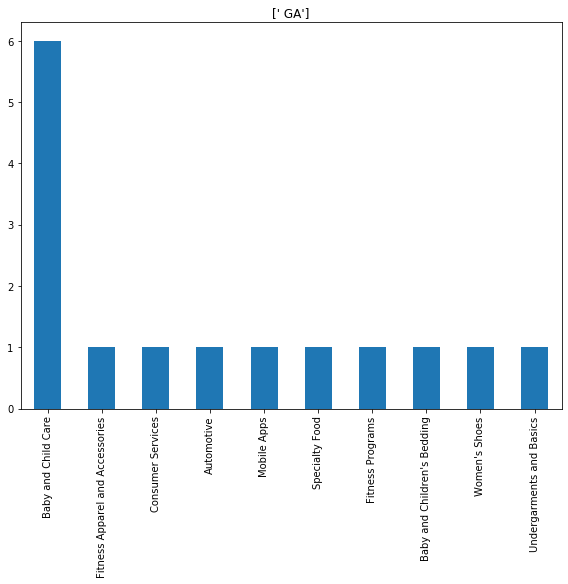

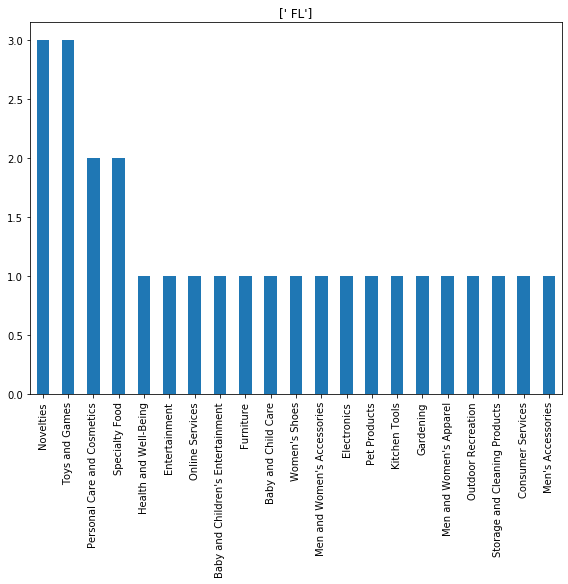

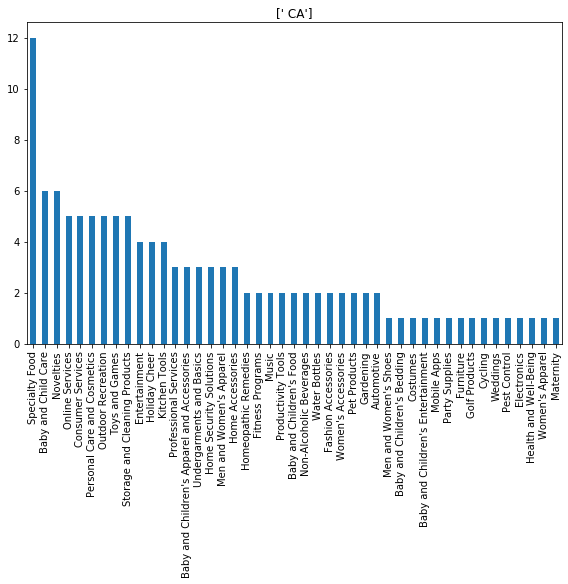

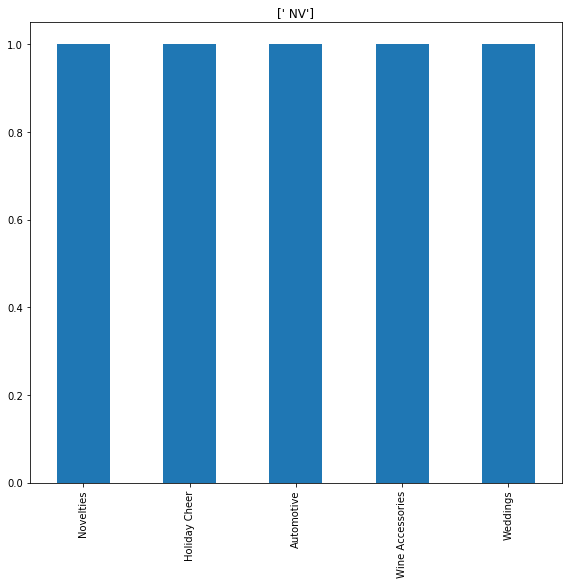

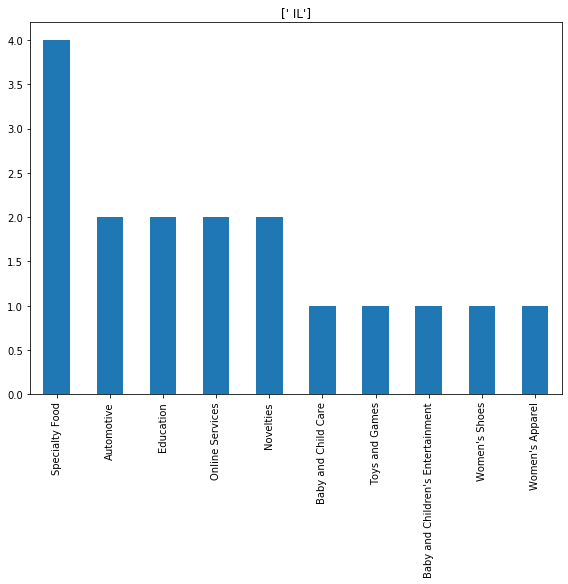

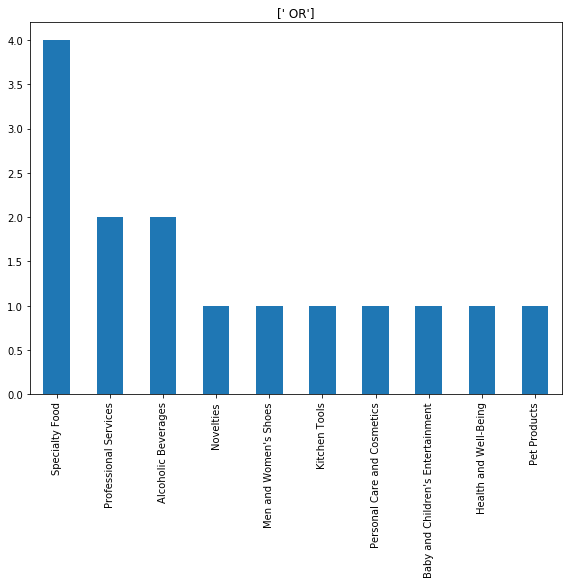

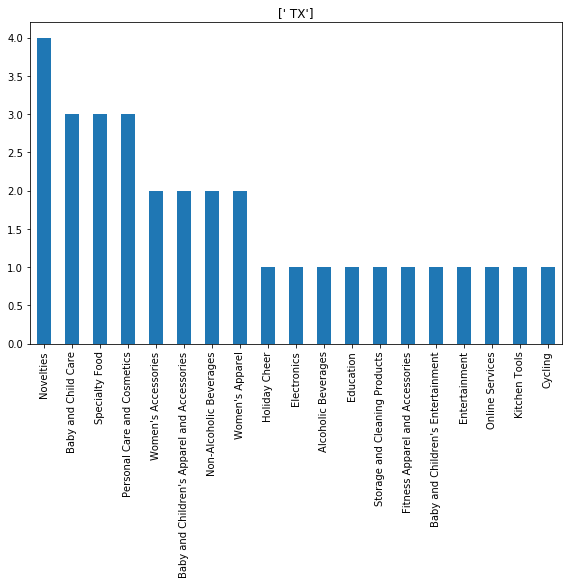

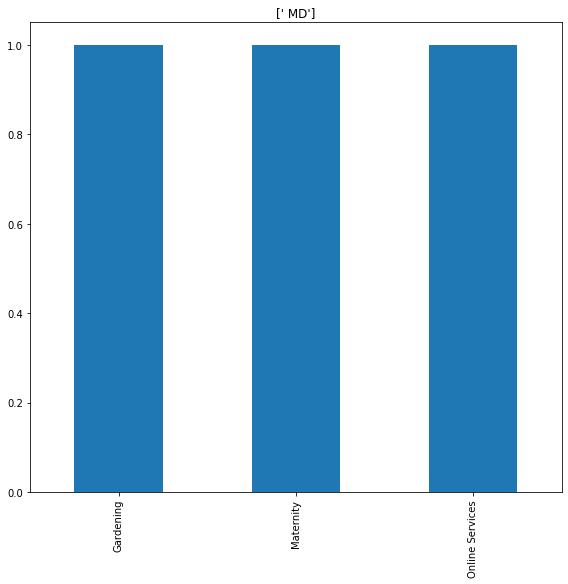

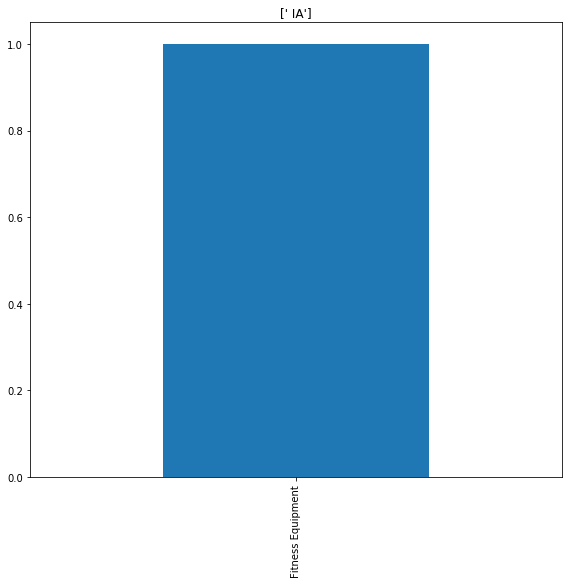

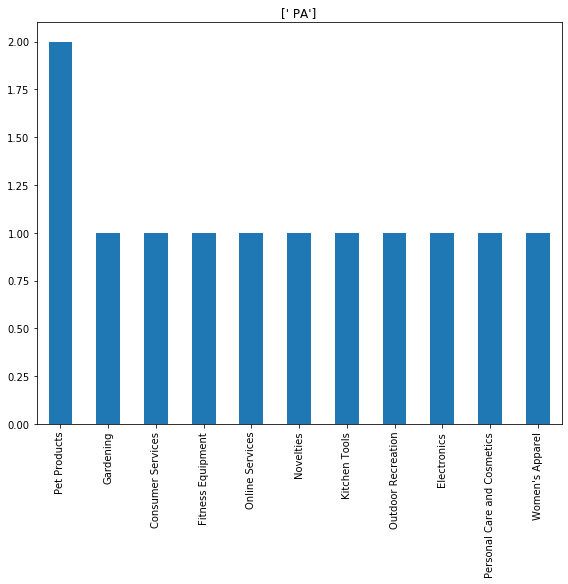

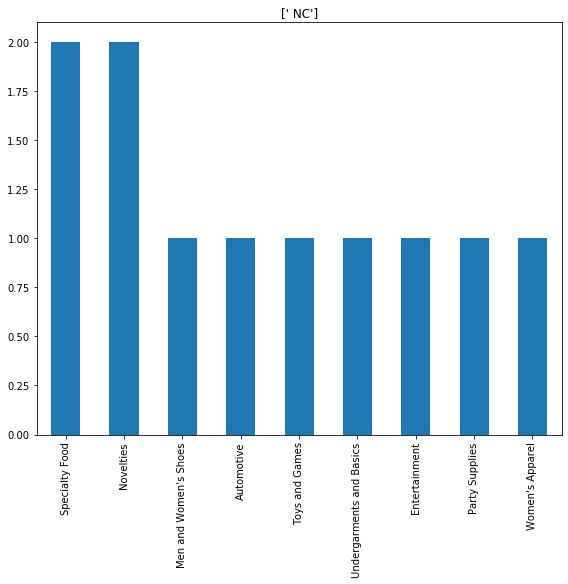

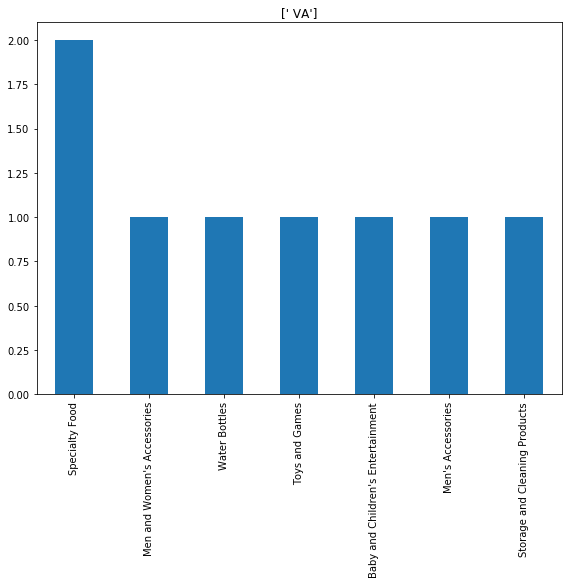

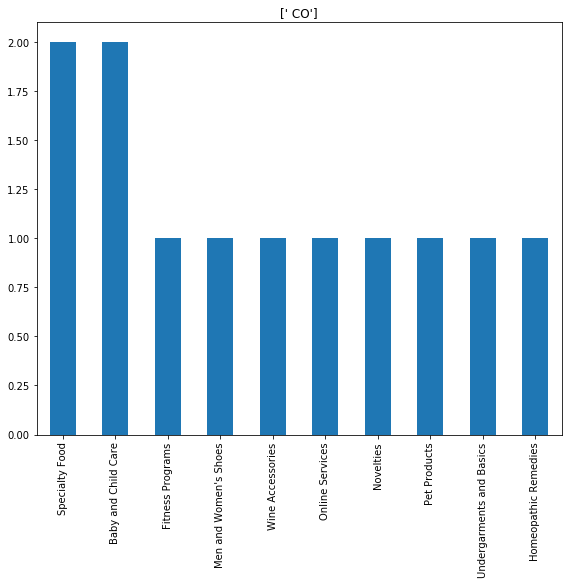

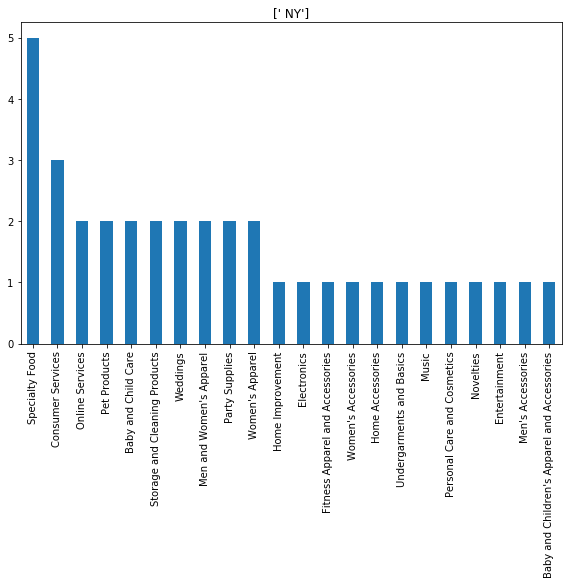

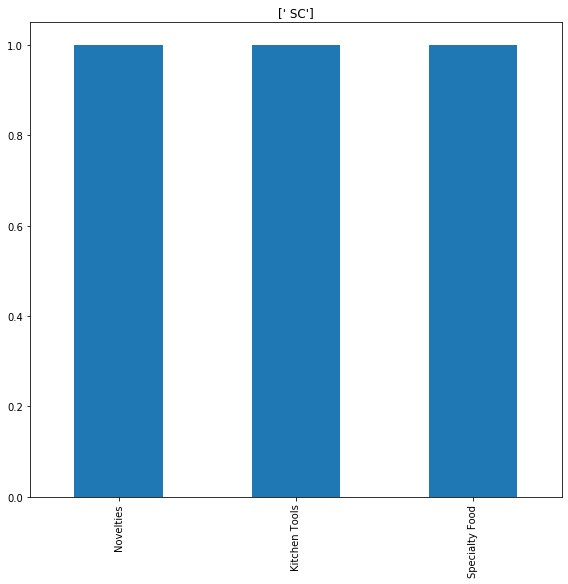

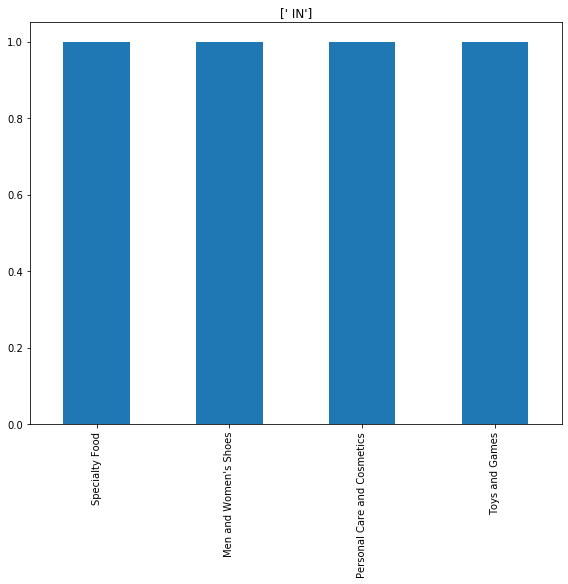

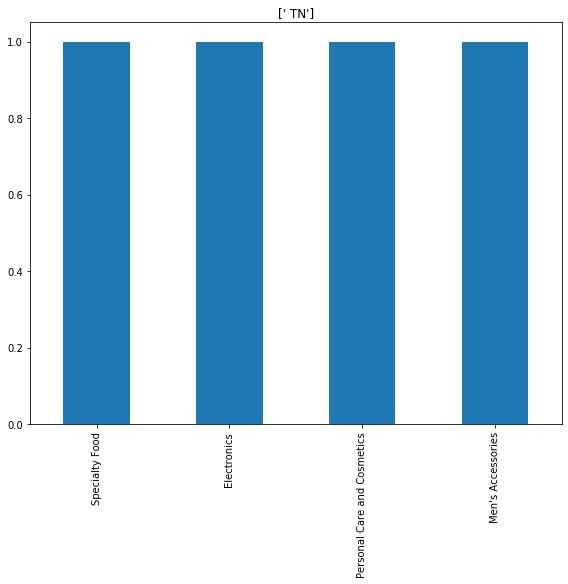

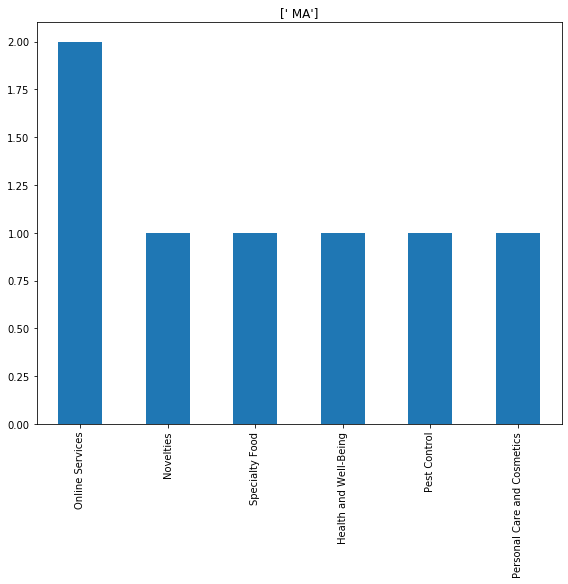

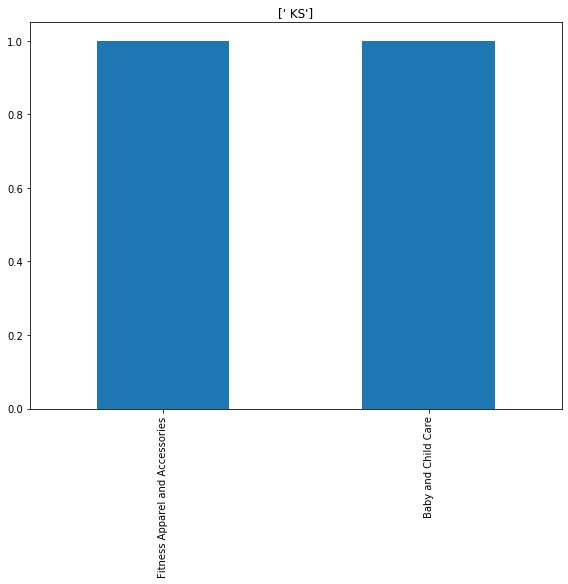

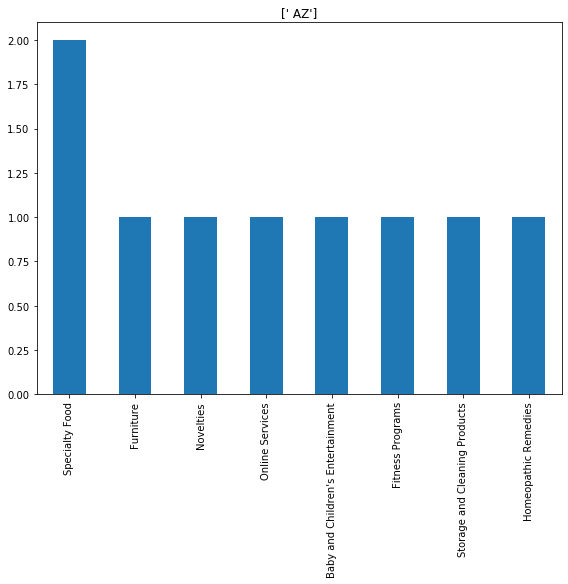

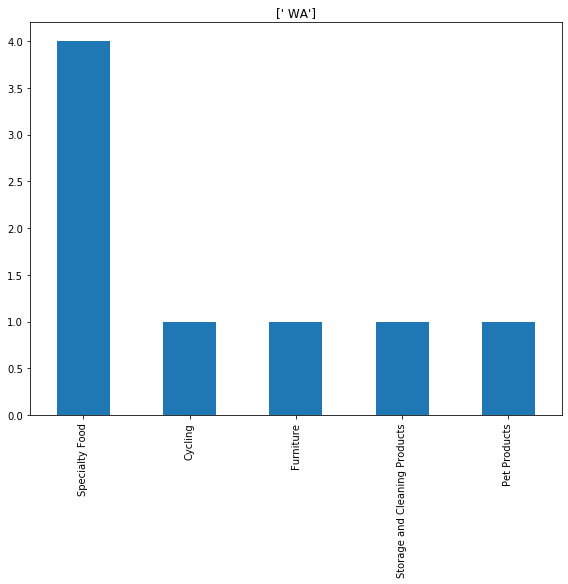

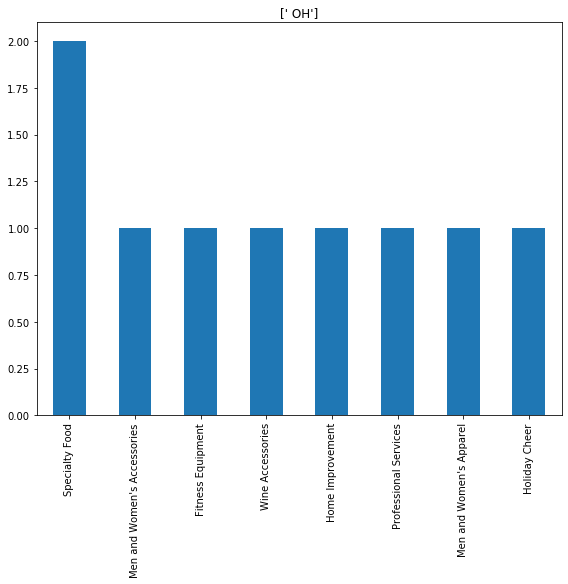

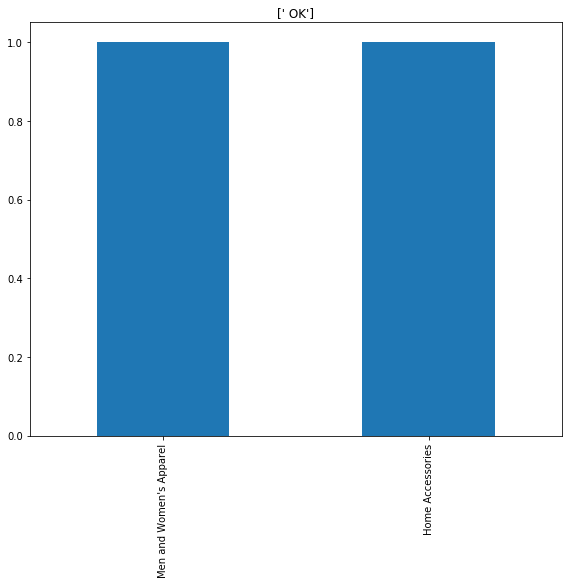

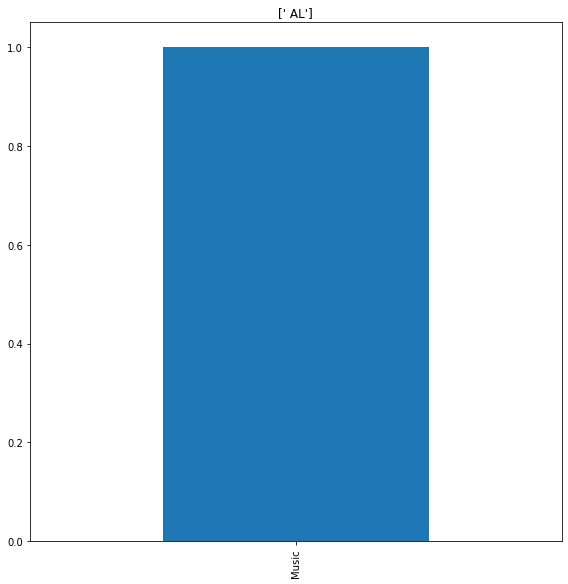

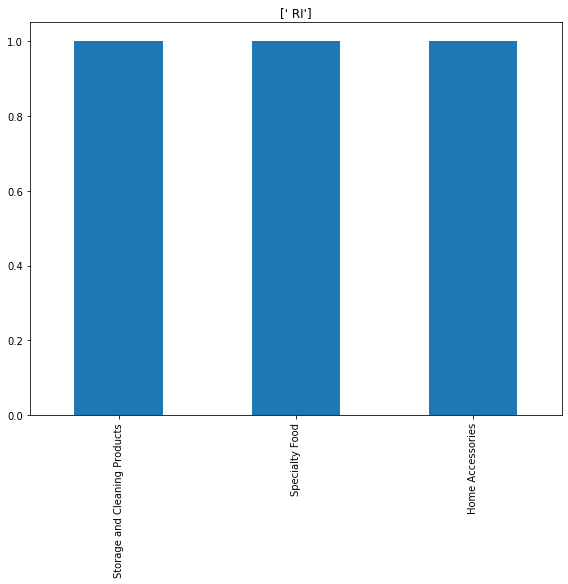

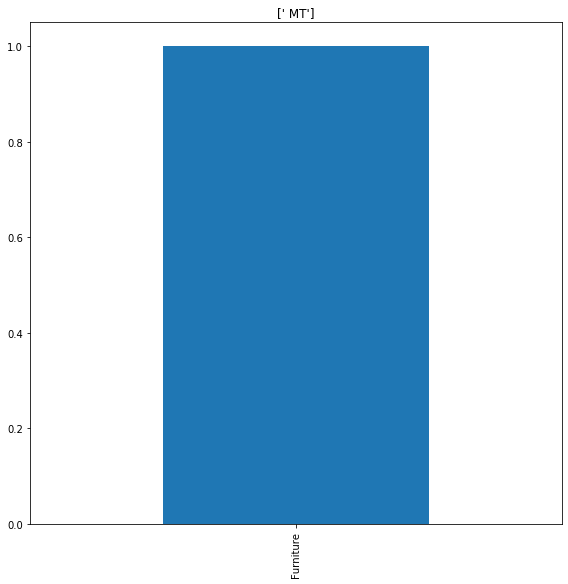

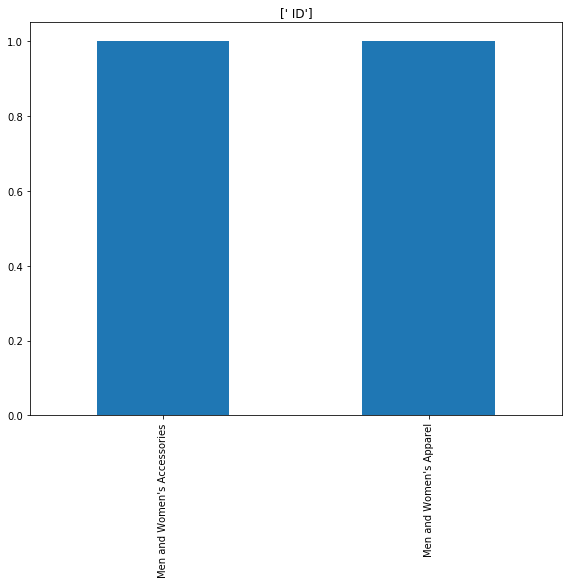

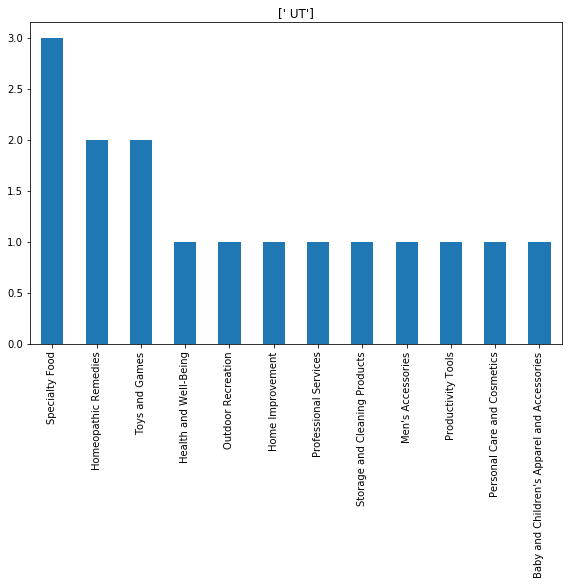

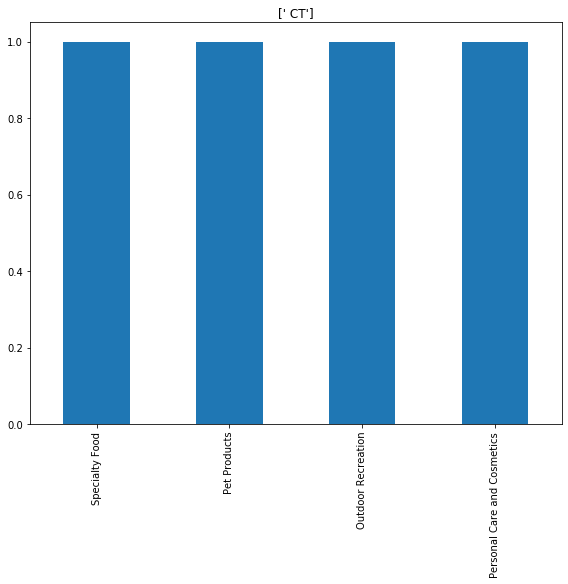

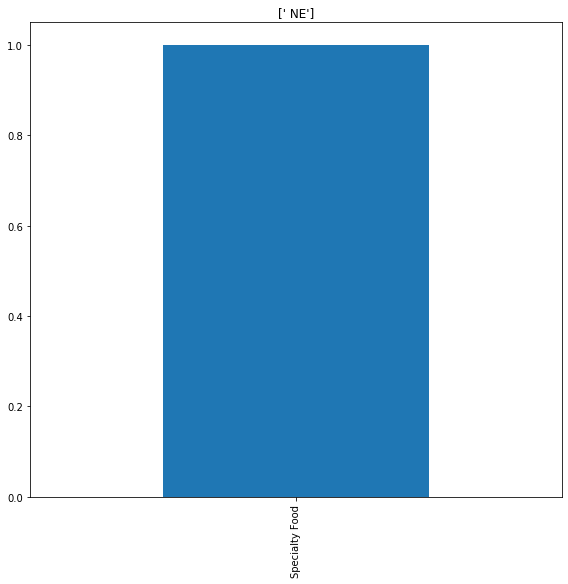

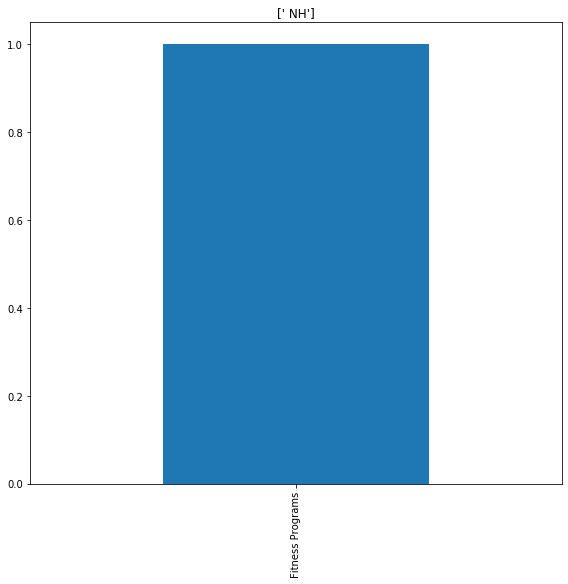

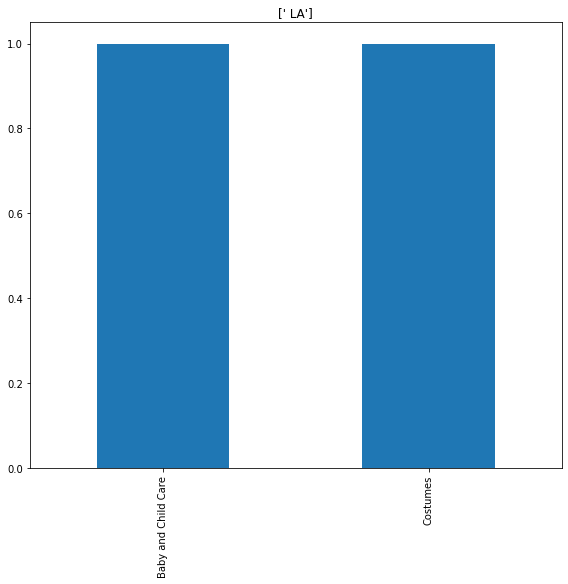

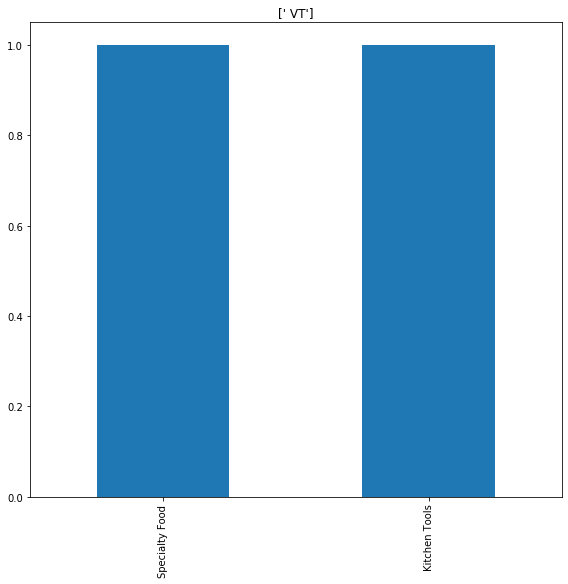

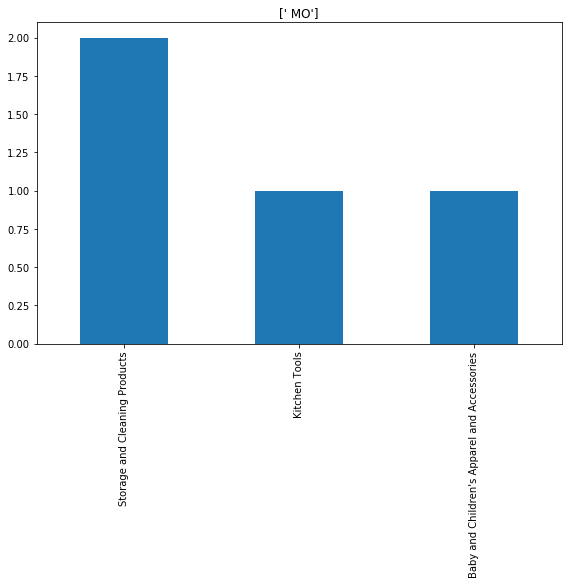

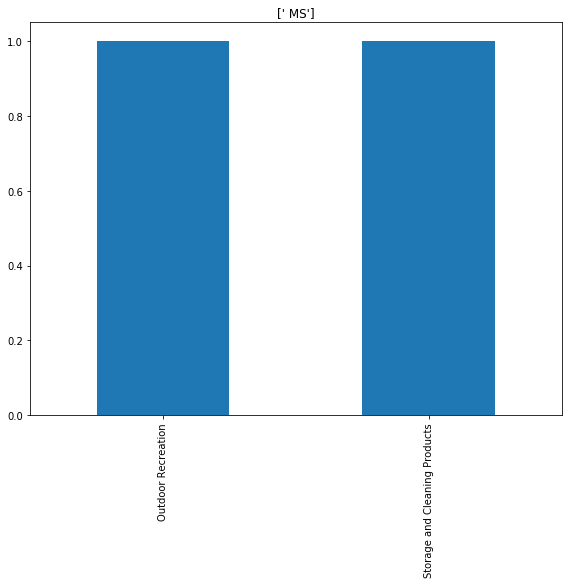

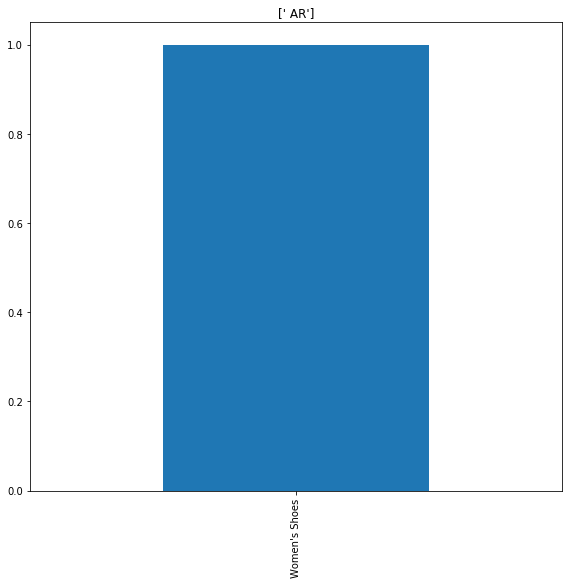

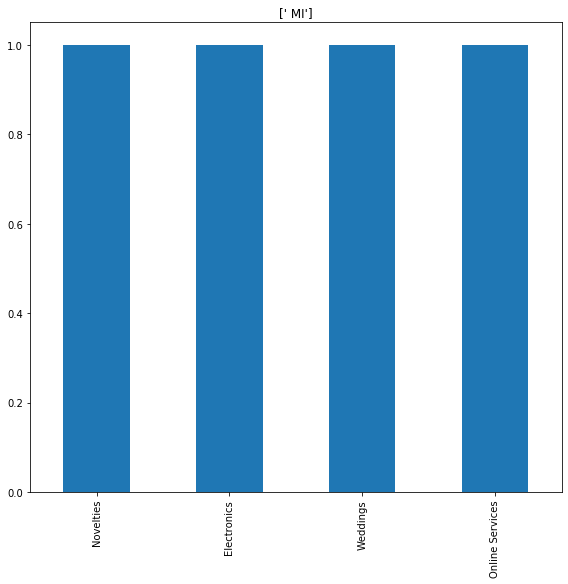

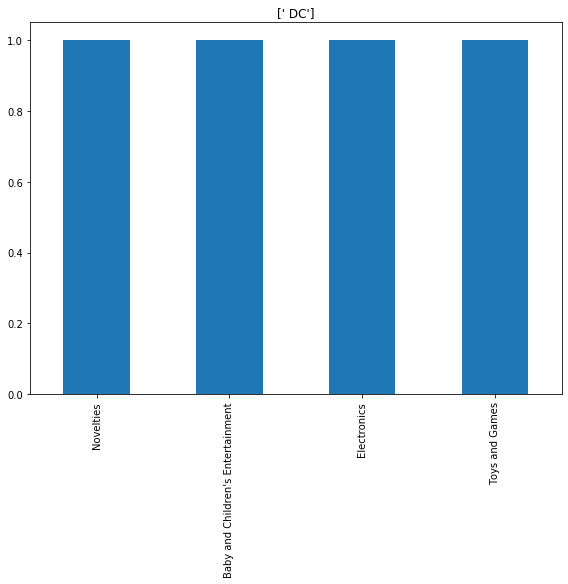

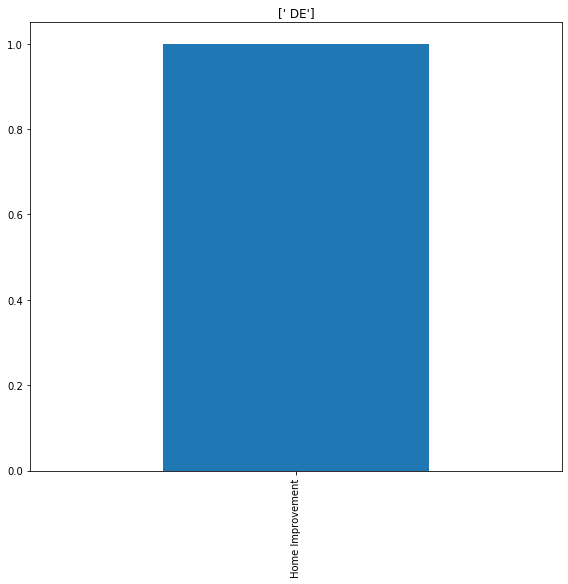

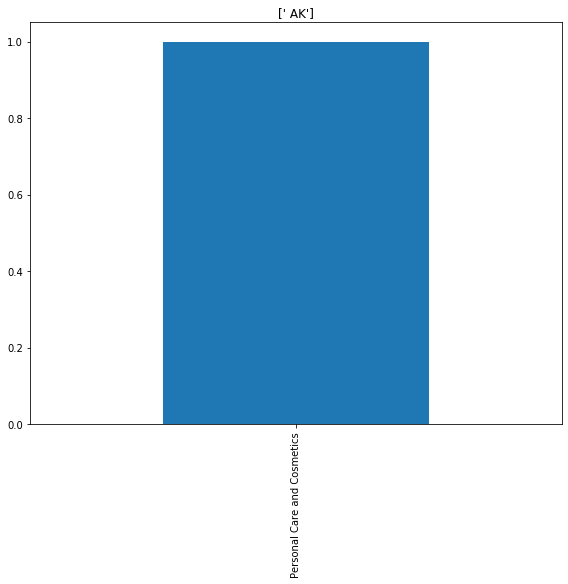

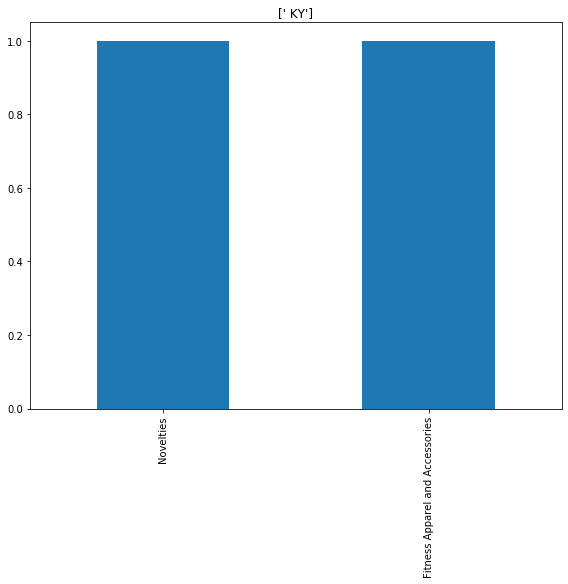

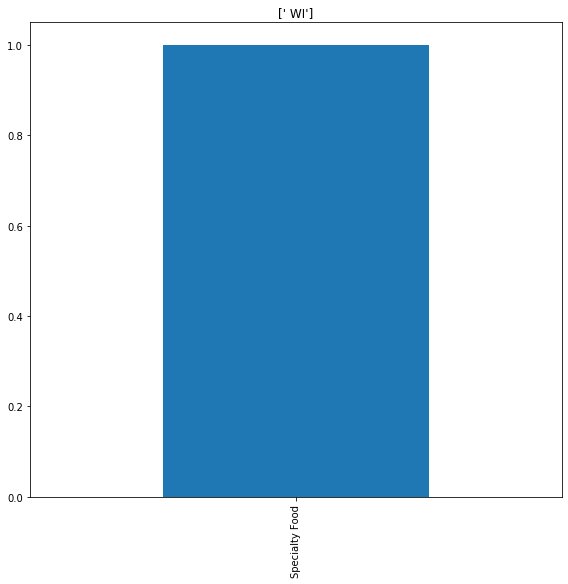

In [51]:
# breakdown of all pitches by category by state

i=0

for f in all_dfs:

    plt.figure(figsize=(15,8))
    
    f.category.value_counts().plot(kind='bar',figsize=(8,8))
        
    plt.tight_layout()
    
    plt.title(f.location.unique())
    
    i = i + 1

    plt.show()

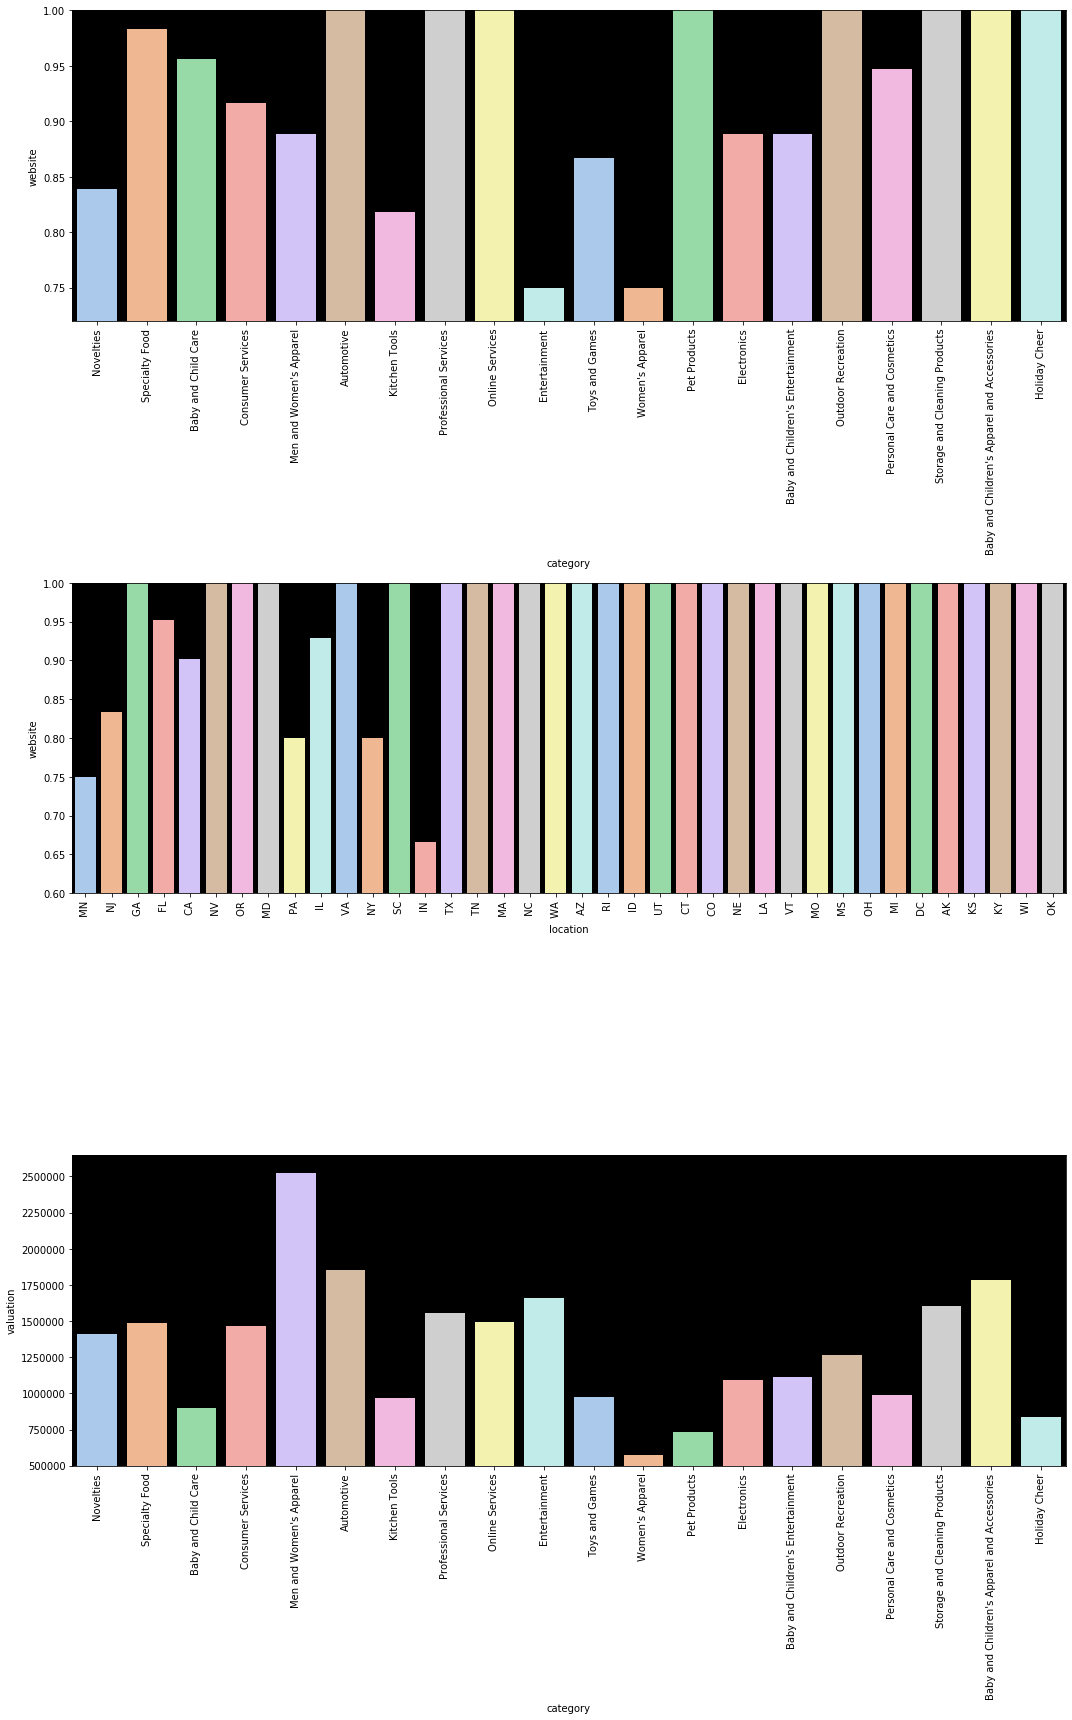

In [75]:
# likelihood of haivng website based on categoyr in leading categories

with sns.axes_style({'axes.facecolor':'black'}):

    plt.figure(figsize=(15,24))

    plt.subplot(3,1,1)
    sns.barplot(top_cat_df.category,top_cat_df.website,palette='pastel',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(0.72,1)
    plt.tight_layout()
    
    plt.subplot(3,1,2)
    sns.barplot(top_cat_df.location,top_cat_df.website,palette='pastel',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(0.6,1)
    plt.tight_layout()
    
    plt.subplot(3,1,3)
    sns.barplot(top_cat_df.category,top_cat_df.valuation,palette='pastel',ci=False)
    plt.xticks(rotation='vertical')
    plt.ylim(500000)
    plt.tight_layout()

    plt.show()

In [54]:
# creating data frames for each unique shark group
shark_groups=[]
for group in df.shark_group.unique():
    shark_groups.append(df[df.shark_group==group])

In [55]:
# data on shark group 1 (index 0, but value 1)
shark_groups[0]

,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,shark4,...,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,askedFor_bin,exchangeForStake_bin,valuation_bin
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,1,1000000,15,6666667,1,0,2,1,2
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,1,460000,10,4600000,1,0,1,0,1
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,1,50000,15,333333,1,0,0,1,0
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,1,250000,25,1000000,1,0,0,2,0
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,2,500000,15,3333333,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Cakes made from scratch from family recipes. T...,Specialty Food,Kim Nelson,SC,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,6,50000,25,200000,2,0,0,2,0
78,Designer hospital gowns for expecting moms.,Maternity,Deidrea Haysel,MD,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,6,30000,20,150000,2,0,0,1,0
86,The patented CitiKitty Cat Toilet Training Kit...,Pet Products,Rebecca Rescate,PA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1,9,100000,15,666667,2,0,0,1,0
87,T-shirts for expectant moms that display the d...,Women's Apparel,Kim Preis,IL,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,0,9,50000,15,333333,2,0,0,1,0


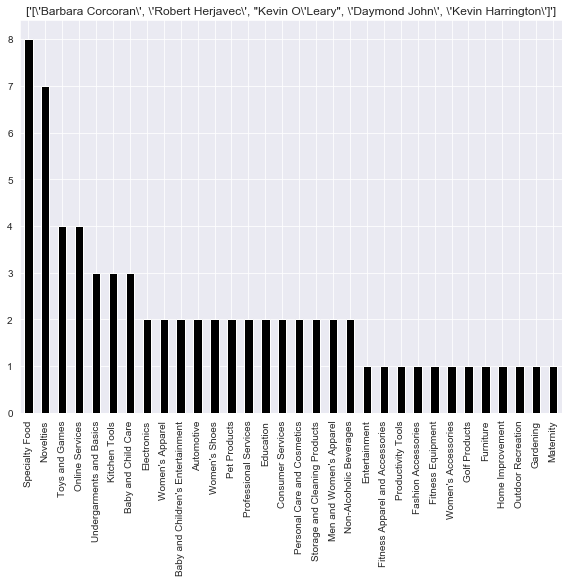

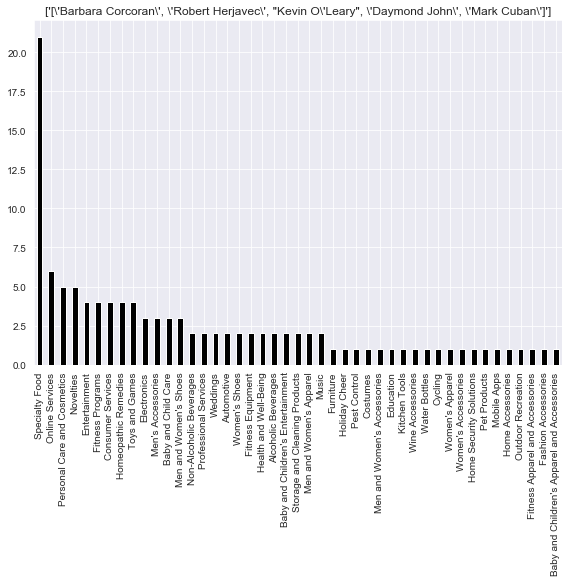

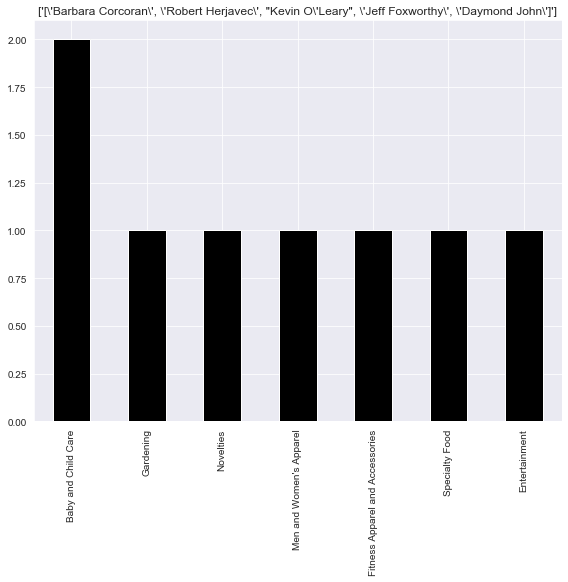

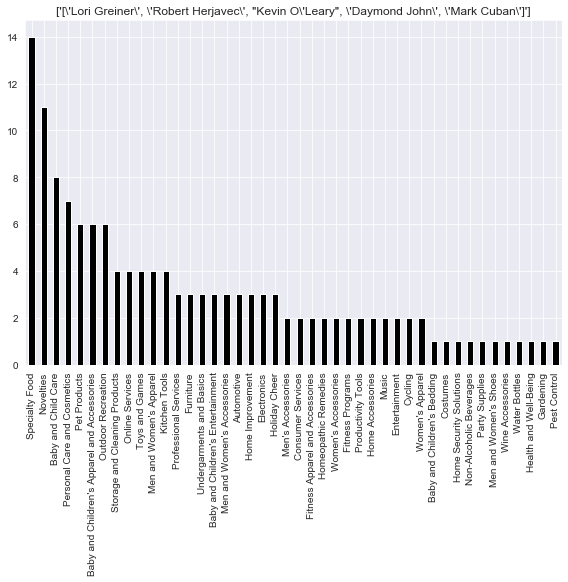

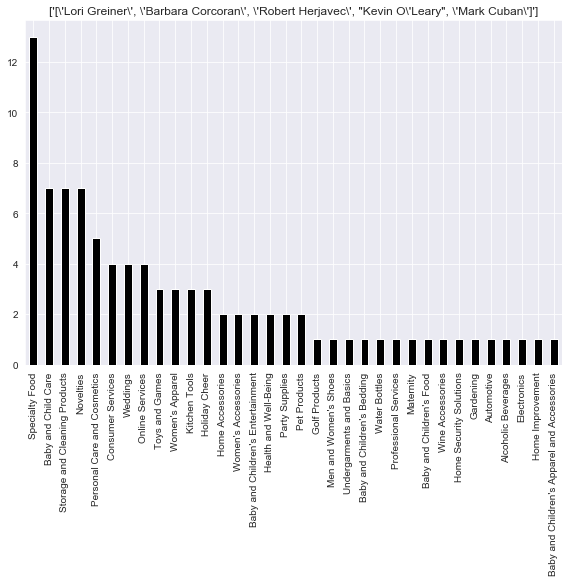

In [77]:
# breakdown of pitches baased on shark group

with sns.axes_style('darkgrid'):

    i=0

    for f in shark_groups[0:5]:

        plt.figure(figsize=(15,8))

        f.category.value_counts().plot(kind='bar',figsize=(8,8),color='k')

        plt.tight_layout()

        plt.title(f.sharks.unique())

        i = i + 1

        plt.show()

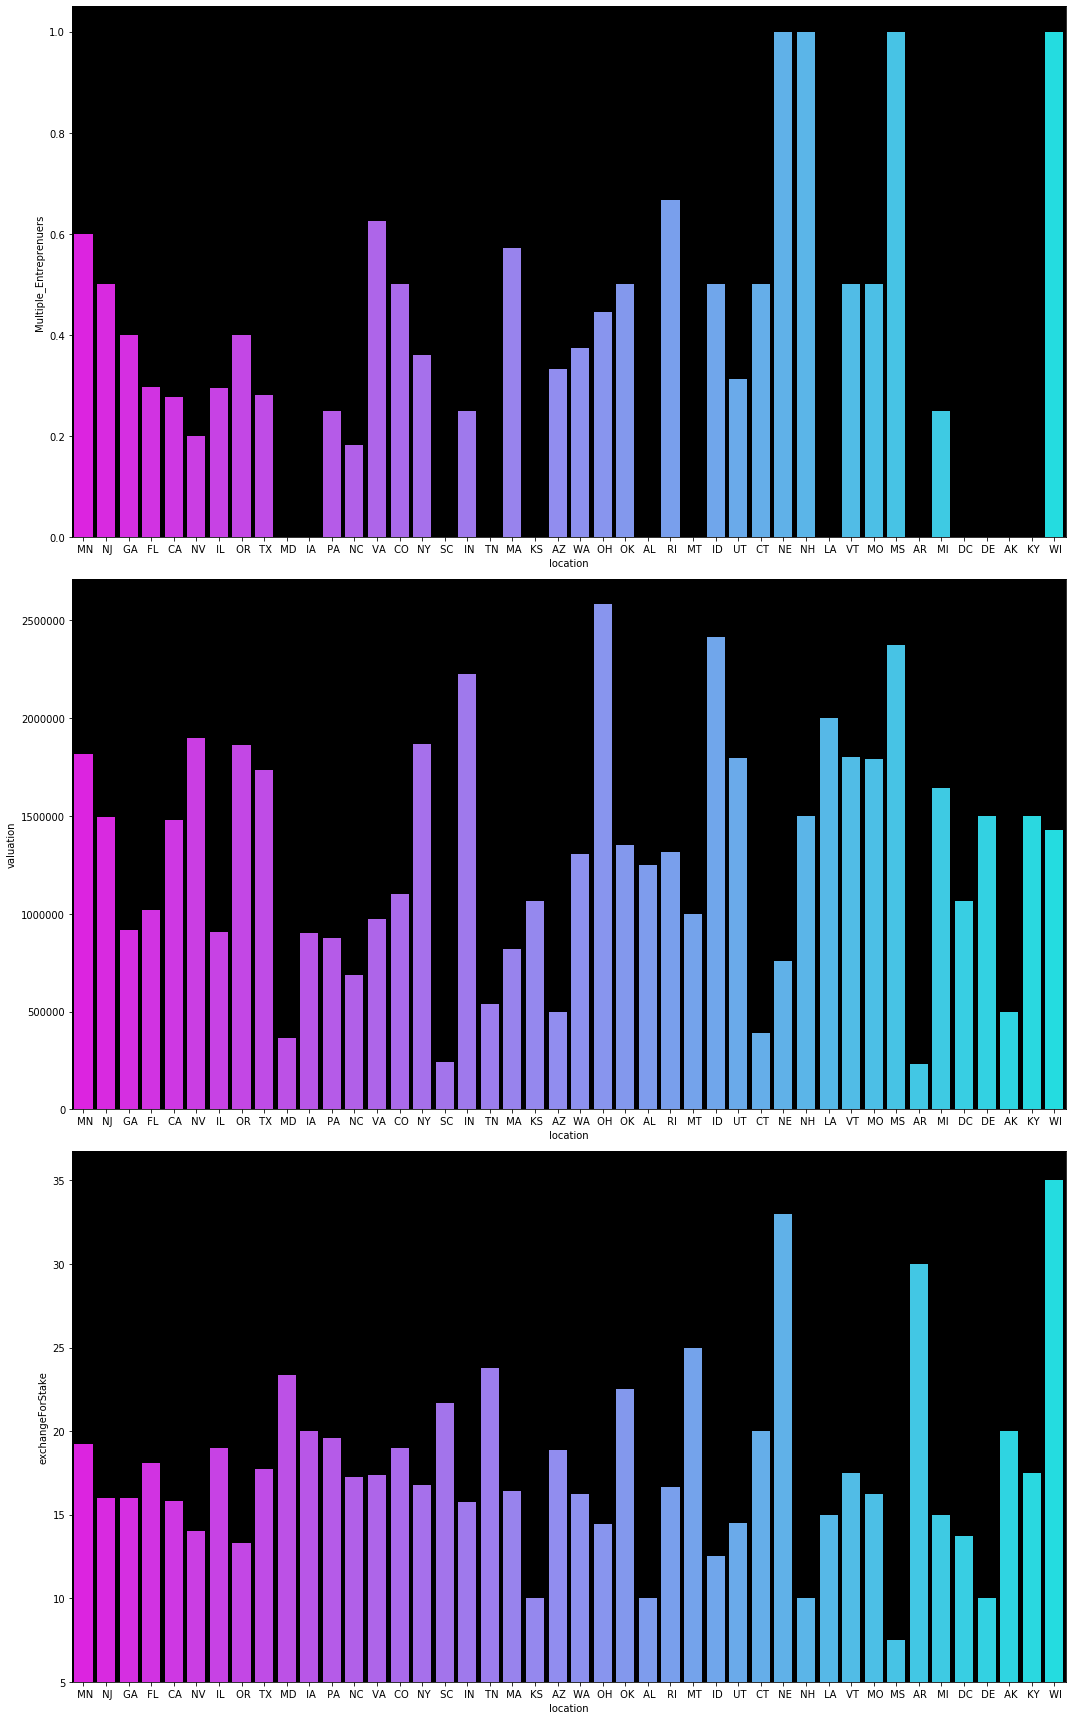

In [105]:
# various mean stats based on location

with sns.axes_style({'axes.facecolor':'k'}):

    plt.figure(figsize=(15,24))

    plt.subplot(3,1,1)
    sns.barplot(df.location,df.Multiple_Entreprenuers,ci=None,palette='cool_r')
    plt.tight_layout()
    
    plt.subplot(3,1,2)
    sns.barplot(df.location,df.valuation,ci=None,palette='cool_r')
    plt.tight_layout()

    plt.subplot(3,1,3)
    sns.barplot(df.location,df.exchangeForStake,ci=None,palette='cool_r')
    plt.ylim(5)
    plt.tight_layout()
    
    plt.show()

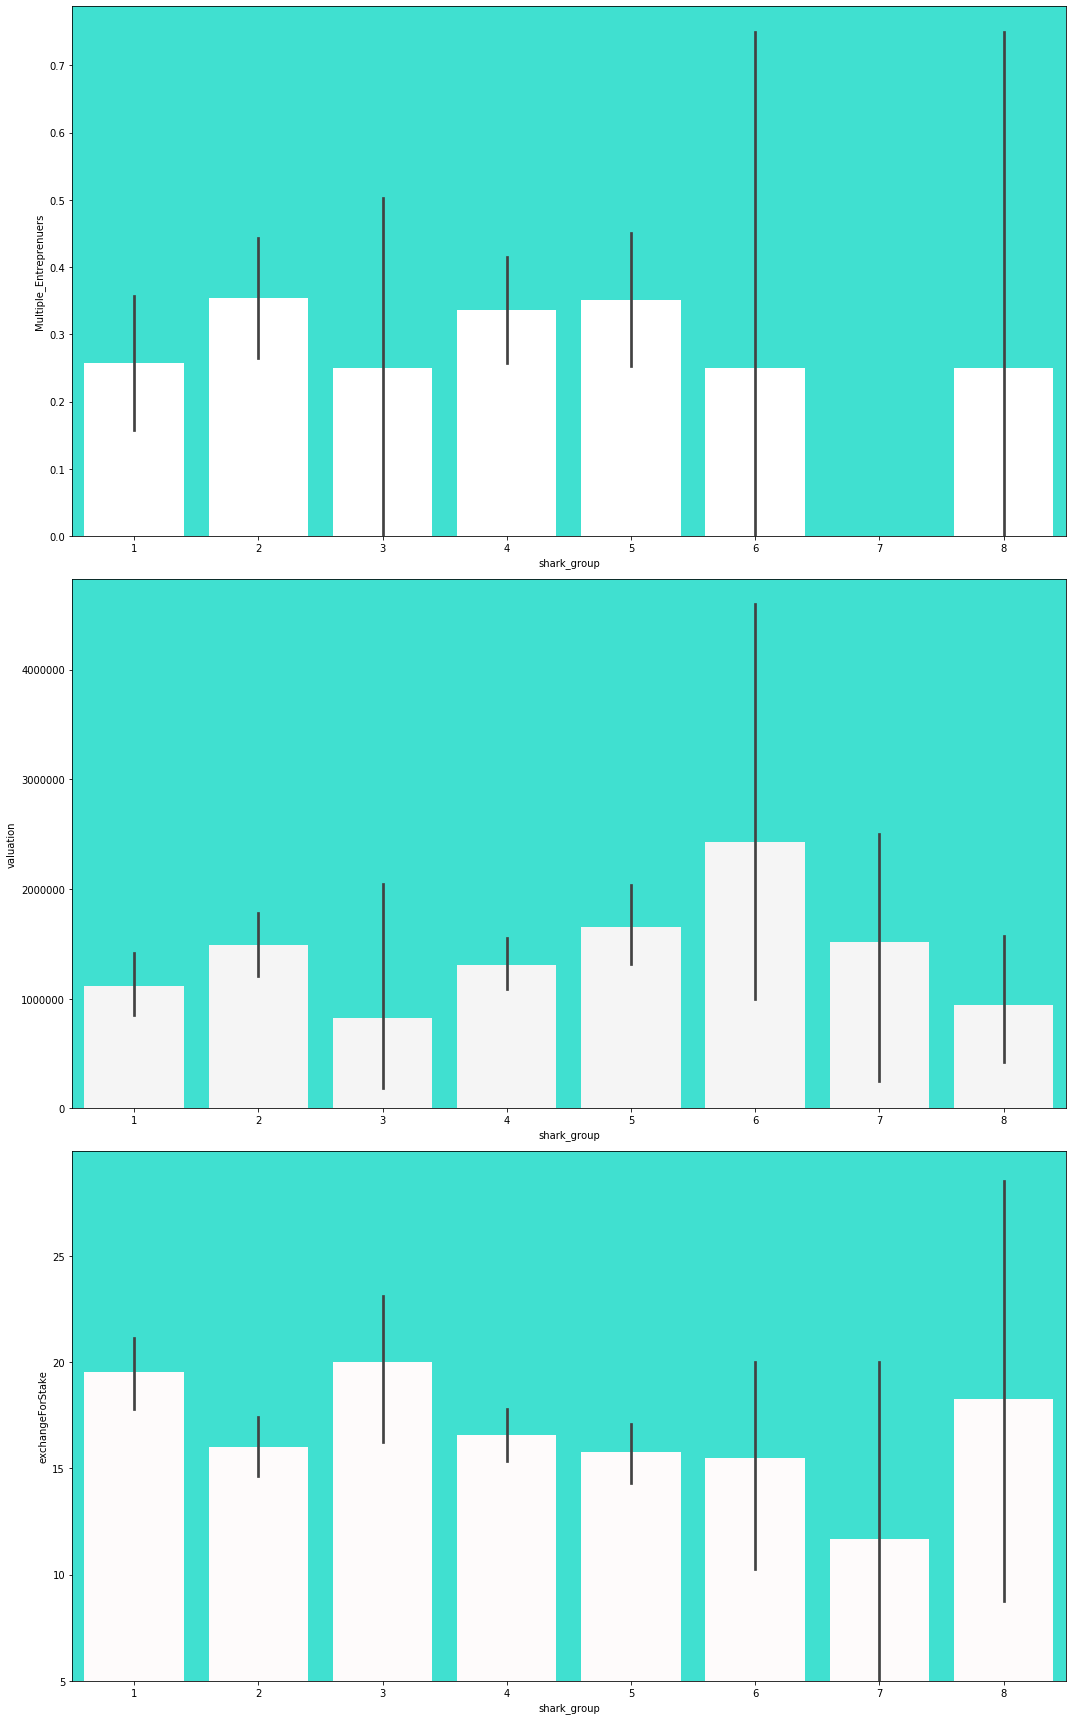

In [102]:
# vvarious mean stats with error bar based on shark group

with sns.axes_style({'axes.facecolor':'turquoise'}):

    plt.figure(figsize=(15,24))

    plt.subplot(3,1,1)
    sns.barplot(df.shark_group,df.Multiple_Entreprenuers,color='white')
    plt.tight_layout()
    
    plt.subplot(3,1,2)
    sns.barplot(df.shark_group,df.valuation,color='whitesmoke')
    plt.tight_layout()

    plt.subplot(3,1,3)
    sns.barplot(df.shark_group,df.exchangeForStake,color='snow')
    plt.ylim(5)
    plt.tight_layout()
    
    plt.show()

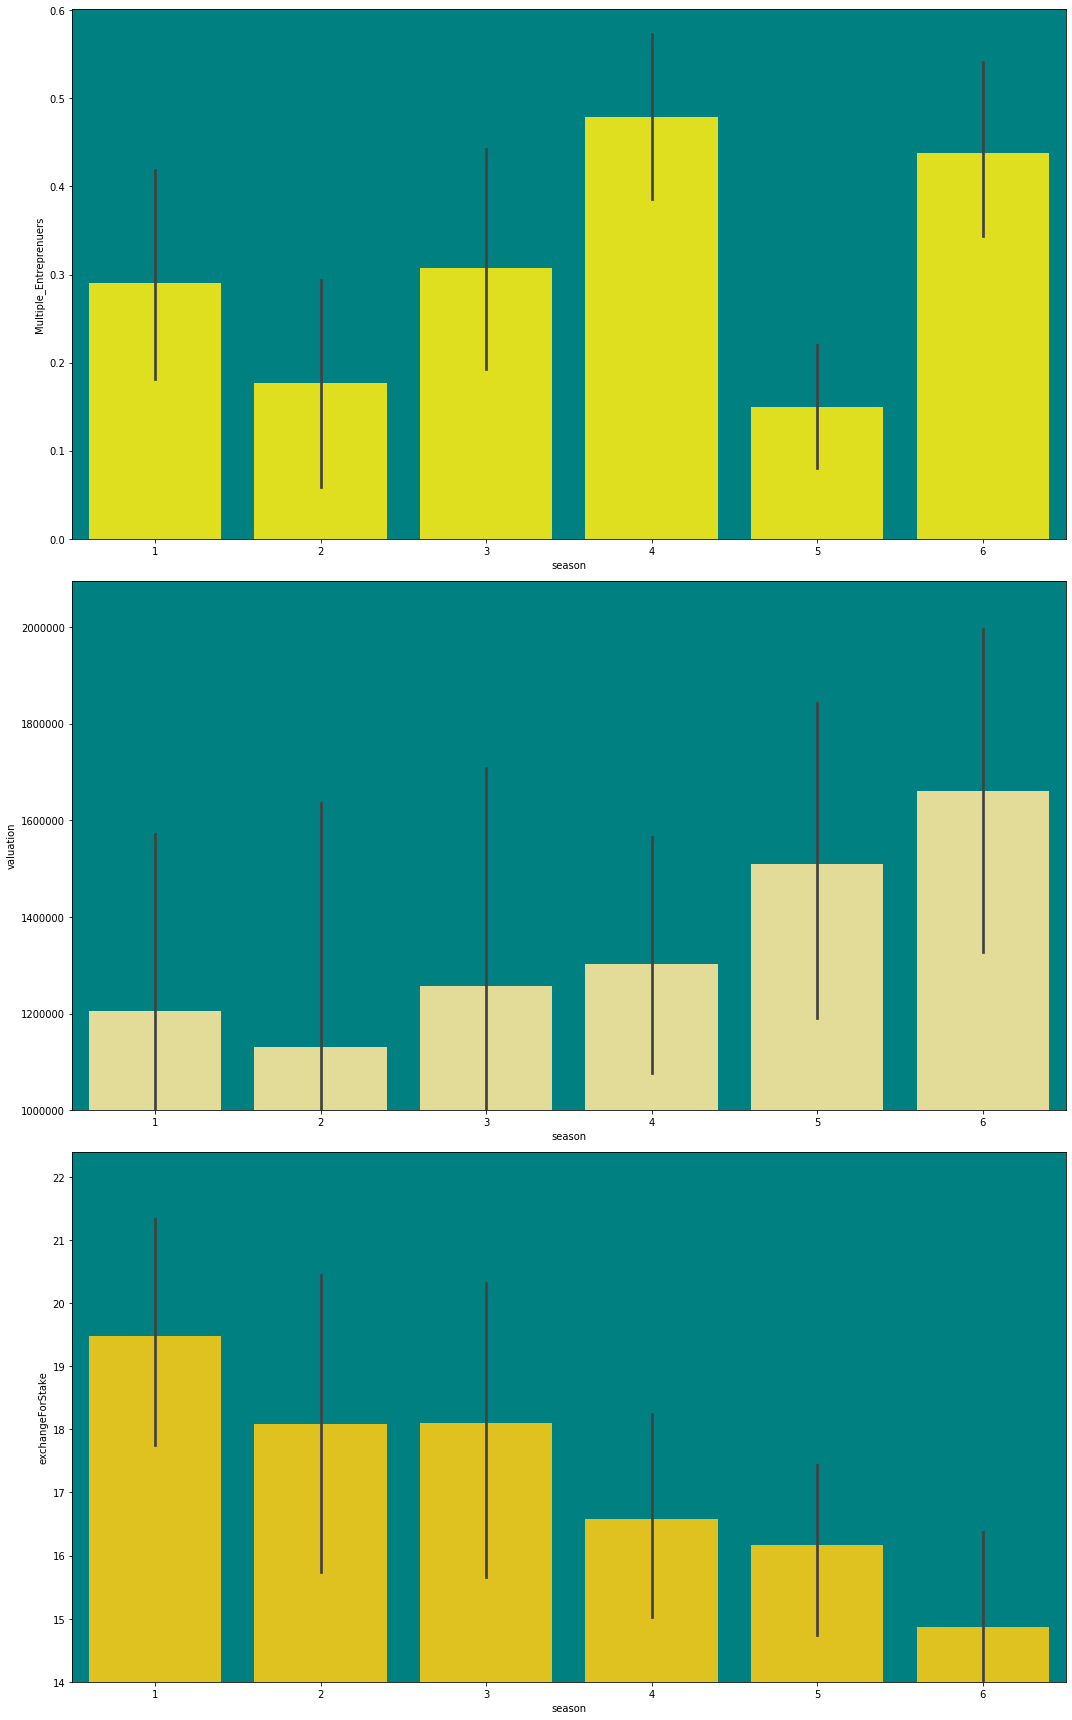

In [122]:
# various stats with error bar based on season

with sns.axes_style({'axes.facecolor':'teal'}):

    plt.figure(figsize=(15,24))

    plt.subplot(3,1,1)
    sns.barplot(df.season,df.Multiple_Entreprenuers,color='yellow')
    plt.tight_layout()
    
    plt.subplot(3,1,2)
    sns.barplot(df.season,df.valuation,color='khaki')
    plt.ylim(10**6,)
    plt.tight_layout()

    plt.subplot(3,1,3)
    sns.barplot(df.season,df.exchangeForStake,color='gold')
    plt.ylim(14)
    plt.tight_layout()
    
    plt.show()

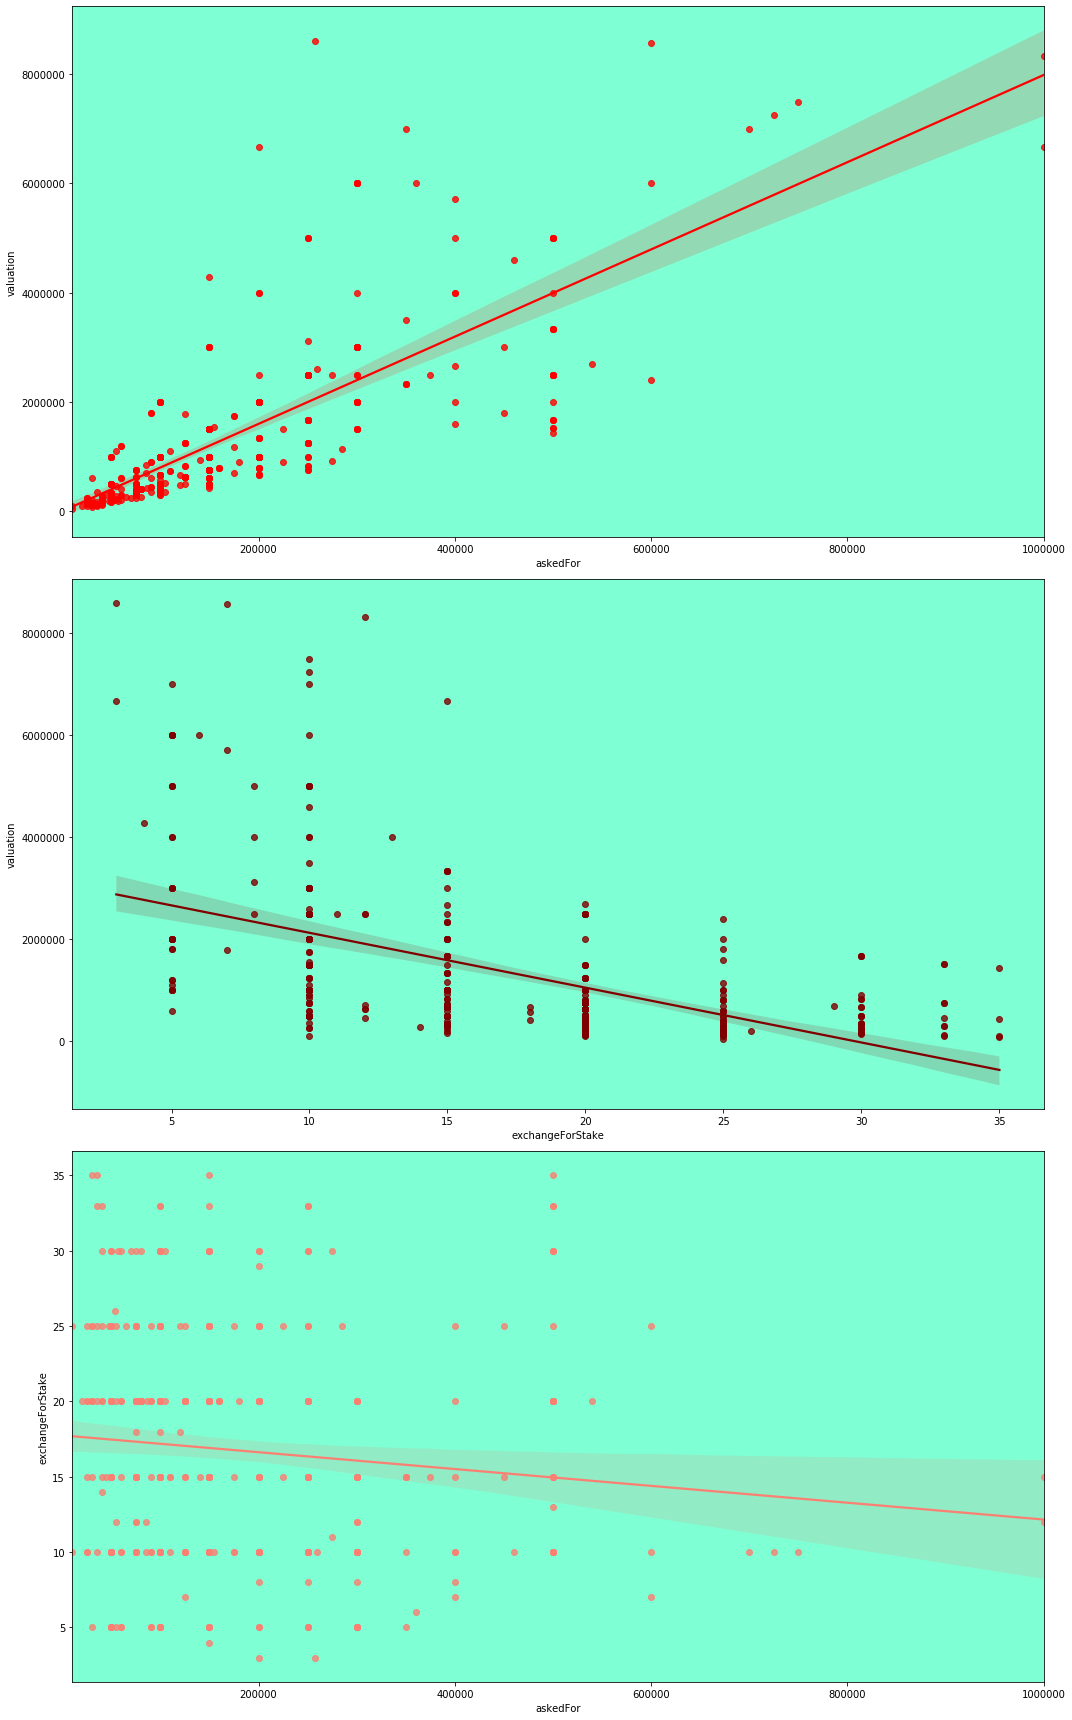

In [120]:
# various regression plots based on asked-for, valuation, and stake love triagle

with sns.axes_style({'axes.facecolor':'aquamarine'}):

    plt.figure(figsize=(15,24))

    plt.subplot(3,1,1)
    sns.regplot(df.askedFor,df.valuation,color='red')
    plt.tight_layout()
    
    plt.subplot(3,1,2)
    sns.regplot(df.exchangeForStake,df.valuation,color='maroon')
    plt.tight_layout()

    plt.subplot(3,1,3)
    sns.regplot(df.askedFor,df.exchangeForStake,color='salmon')
    plt.tight_layout()
    
    plt.show()